# **Credit Card Fraud Detection Model**

## **Project Overview**
Credit card fraud involves the illegal use of someone else's credentials to make fraudulent credit card transactions so that the individual is charged for items that they did not purchase. The person whose credit card is mishandled usually ends up with unpaid debt. He/she may be unable to obtain new credit due to a poor credit score (at least until matters are sorted out), which makes early detection of fraudulent transactions by credit card companies crucial.

## **Project Objectives**
This project is to build a **Machine Learning Model** to assist banks and/or credit union to predict if a transaction is fraudulent or legitimate.



## **Table of Content**
1

2

3

## **Importing the neccesary packages**

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Plotly
import plotly.express as px 
import plotly.graph_objects as go

import sklearn

#date library
import datetime

import warnings
warnings.filterwarnings('ignore')

## **Importing the needed classes for building models,validation, and metrics**

In [11]:
#model selection libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

#classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC 
from sklearn.svm import LinearSVC

#ensemble libraries
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

#XGBoost
from xgboost import XGBClassifier

#preprocessing libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

#pipipelines
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

#metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

#imblearn
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.pipeline import Pipeline
from collections import Counter

## **Data-importation**

In [12]:
data=pd.read_csv('creditcard.csv')

In [13]:
#creating a path for our dataset
#path = "/content/drive/MyDrive/Colab Notebooks/creditcard.csv"

In [14]:
#loading the data and checking the head
#data = pd.read_csv(path)
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Due to confidentiality issue, original features V1, V2,... V28 have been transformed with PCA, however, we may guess that these features might be originally credit card number, expiry date, CVV, cardholder name, transaction location, transaction date-time, etc.

The only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning.

Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [15]:
#checking the number of rows and columns
data.shape
print("The dataset has {} rows and {} columns.".format(data.shape[0],data.shape[1]))

The dataset has 284807 rows and 31 columns.


## **Preprocessing**

### Checking for missing values

In [16]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

**Observation**

There were no missing values in our data

### Checking the data types of the different columns

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Checking for duplicates

In [18]:
data[data.duplicated()]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282987,171288.0,1.912550,-0.455240,-1.750654,0.454324,2.089130,4.160019,-0.881302,1.081750,1.022928,...,-0.524067,-1.337510,0.473943,0.616683,-0.283548,-1.084843,0.073133,-0.036020,11.99,0
283483,171627.0,-1.464380,1.368119,0.815992,-0.601282,-0.689115,-0.487154,-0.303778,0.884953,0.054065,...,0.287217,0.947825,-0.218773,0.082926,0.044127,0.639270,0.213565,0.119251,6.82,0
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,...,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0


In [19]:
data.duplicated().sum()
print("The dataset contains {}, and we need to drop it".format(data.duplicated().sum()))

The dataset contains 1081, and we need to drop it


In [20]:
#dropping duplicated rows
data.drop_duplicates(inplace=True)
print("The dataset after removing duplicates now has {} rows and {} columns".format(data.shape[0],data.shape[1]))

The dataset after removing duplicates now has 283726 rows and 31 columns


## **Exploratory-data-analysis**

### *Samplling Data*
We have a very large dataset hence the need to sample fraction of the dataset to aid in efficiency of running the codes.

In [21]:
#Sampling 5% of our the data randomly 
sample_df = data.sample(frac= 0.05, random_state = 42)
sample_df.shape
print("The sampled data has {} rows and {} columns. Random State was set to help reproductivity.".format(sample_df.shape[0],sample_df.shape[1]))

The sampled data has 14186 rows and 31 columns. Random State was set to help reproductivity.


#### *Distribution of Sample data against Original data*

In [22]:
#checking the distribution of the class from the sample data against the actual data
print(sample_df["Class"].value_counts())
print('\n')
print(sample_df["Class"].value_counts(normalize=True)) #normlize returns the relative frequencies of the class

Class
0    14161
1       25
Name: count, dtype: int64


Class
0    0.998238
1    0.001762
Name: proportion, dtype: float64


In [23]:
print(data["Class"].value_counts())
print('\n')
print(data["Class"].value_counts(normalize=True))

Class
0    283253
1       473
Name: count, dtype: int64


Class
0    0.998333
1    0.001667
Name: proportion, dtype: float64


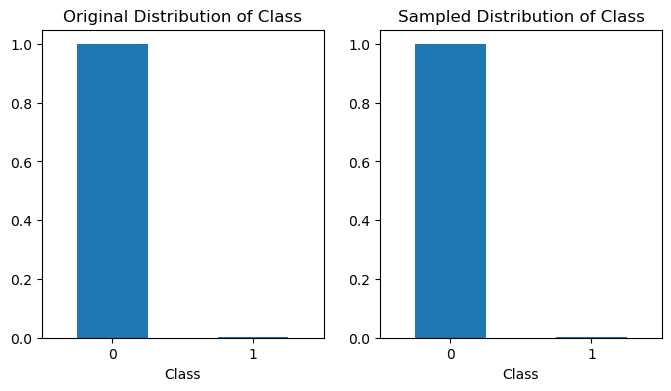

In [24]:
#visulizing both cases
plt.figure(figsize=(8,4))
#original Data
plt.subplot(1,2,1)
data["Class"].value_counts(normalize=True).plot(kind='bar',rot=0)
plt.title("Original Distribution of Class")

#sampled Data
plt.subplot(1,2,2)
sample_df["Class"].value_counts(normalize=True).plot(kind='bar',rot=0)
plt.title("Sampled Distribution of Class")

plt.show()

This dataset has 473 frauds out of 283,726 transactions. The dataset is **highly unbalanced**, the positive class (frauds) account for 0.167% of all transactions.The sampled dataset on the other hand, had 25 frauds out of 14,161 transactions. 

Most of the transactions are non-fraud. If we use this dataframe as the base for our predictive models and analysis, our algorithms will probably overfit since it will "assume" that most transactions are not a fraud. But we don't want our model to assume, we want our model to detect patterns that give signs of fraud!

In [25]:
#saving sampled data for future use. 
#sample_df.to_csv("Sample_data.csv",index=False)

### *Univariate Analysis*

#### 1. Spliting our data into **Fraud** and **Not Fraud**

In [26]:
is_fraud = sample_df[sample_df['Class']==1]
no_fraud = sample_df[sample_df['Class']==0]
print("Observation\n The fraud dataset has {} rows and {} columns while the legitimate transaction dataset has {} rows and {} columns.".format(is_fraud.shape[0],is_fraud.shape[1],no_fraud.shape[0],no_fraud.shape[1]))

Observation
 The fraud dataset has 25 rows and 31 columns while the legitimate transaction dataset has 14161 rows and 31 columns.


#### 2. Checking the proportion of fraudulent activities

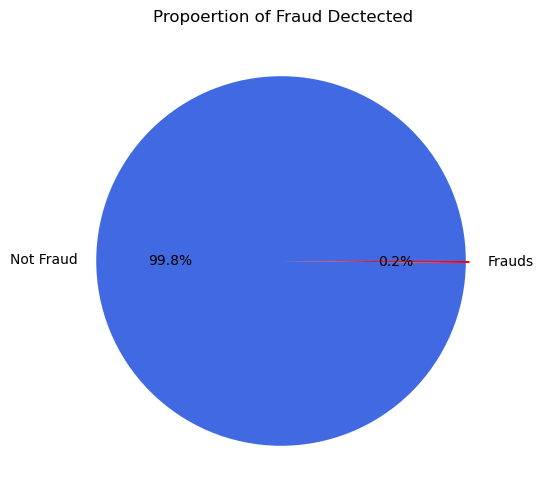

In [27]:
plt.figure(figsize=(10,6))
labels=['Not Fraud' , 'Frauds']
explode = [.01,.01]
color=['royalblue' , 'Red']
sizes=sample_df.Class.value_counts().values

plt.pie(sizes,explode,labels,autopct="%1.1f%%", colors = color)
plt.title('Propoertion of Fraud Dectected')
plt.show()

**Observation**

It is observed that 99.8% of the transaction  is legitimate (No Fraud) and 0.2% transactions is fraudulent. There is still the need to reduce the amount of fraudulent activity desipte the fact that it is less than 1%. 

#### 3. Amount distribution

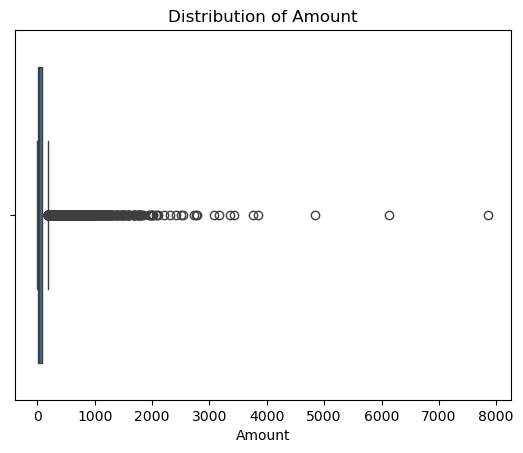

In [28]:
#Using boxplot to check the distribution of the amount coulmn(Overall Dataset). 
sns.boxplot(x=sample_df["Amount"])
plt.title('Distribution of Amount')
plt.show()

**Observation**

It is observed that the data contains outliers. The highest amount is over 7000. 

In [29]:
#Checking the descriptive statistics for Fraudulent cases
is_fraud["Amount"].describe()

count      25.000000
mean      221.875600
std       421.664106
min         0.010000
25%         1.000000
50%        19.730000
75%       130.440000
max      1504.930000
Name: Amount, dtype: float64

In [30]:
#Checking the descriptive statistics for Non-Fraudulent cases
no_fraud["Amount"].describe()

count    14161.000000
mean        86.400479
std        220.963812
min          0.000000
25%          5.930000
50%         22.540000
75%         77.980000
max       7862.390000
Name: Amount, dtype: float64

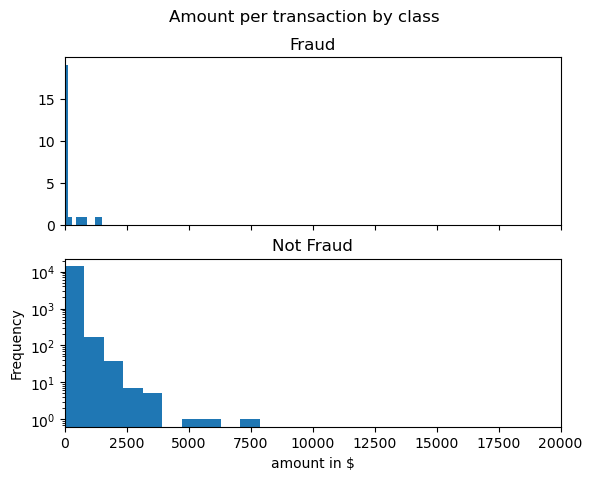

In [31]:
#Plotting the distribution for both
f,(ax1,ax2)=plt.subplots(2,1,sharex=True)
f.suptitle('Amount per transaction by class')
bins =10
ax1.hist(is_fraud.Amount , bins=bins)
ax1.set_title('Fraud')

ax2.hist(no_fraud.Amount,bins=bins)
ax2.set_title('Not Fraud')

plt.xlabel('amount in $')
plt.ylabel('Frequency')

plt.xlim(0,20000)
plt.yscale('log')
plt.show()

**Observation**

It is observed that the highest amount in our data which is USD 7583.32 is not a Fraudulent transaction. Because the highest fraudulent transaction was USD 723.21. Hence amount alone wouldnt be enough to detect a fruadulent activity. 

#### Time distribution

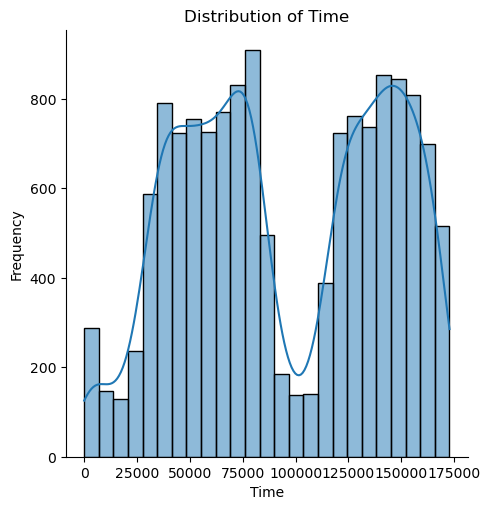

In [32]:
#Using boxplot to check the distribution of the amount coulmn. 
sns.displot(data=sample_df, x="Time", kde=True)
plt.title('Distribution of Time')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

In [33]:
#Checking the descriptive statistics for Fraudulent cases
is_fraud["Time"].describe()

count        25.000000
mean      89614.000000
std       45407.904945
min       17520.000000
25%       48884.000000
50%       87883.000000
75%      133184.000000
max      155359.000000
Name: Time, dtype: float64

In [34]:
#Checking the descriptive statistics for Fraudulent cases
no_fraud["Time"].describe()

count     14161.000000
mean      94972.031848
std       47362.856141
min          12.000000
25%       54463.000000
50%       84751.000000
75%      139551.000000
max      172759.000000
Name: Time, dtype: float64

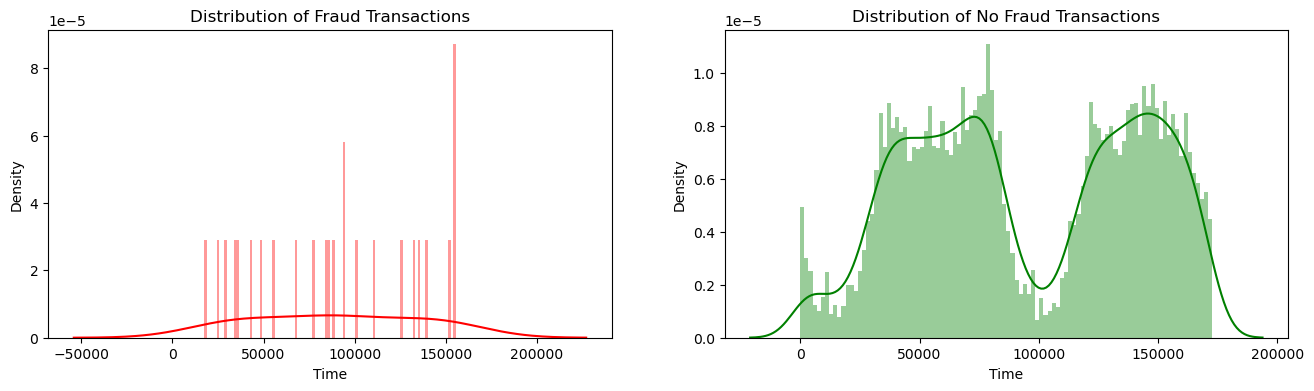

In [35]:
fig, axs = plt.subplots(ncols=2, figsize=(16,4))

sns.distplot(sample_df[(sample_df['Class'] == 1)]['Time'], bins=100, color='red', ax=axs[0])
axs[0].set_title("Distribution of Fraud Transactions")

sns.distplot(sample_df[(sample_df['Class'] == 0)]['Time'], bins=100, color='green', ax=axs[1])
axs[1].set_title("Distribution of No Fraud Transactions")

plt.show()

**Observation**

It is observed that the Time column does not have a normal distribution.

### Multi-variate Analysis

#### Relationship Between Time and Amount

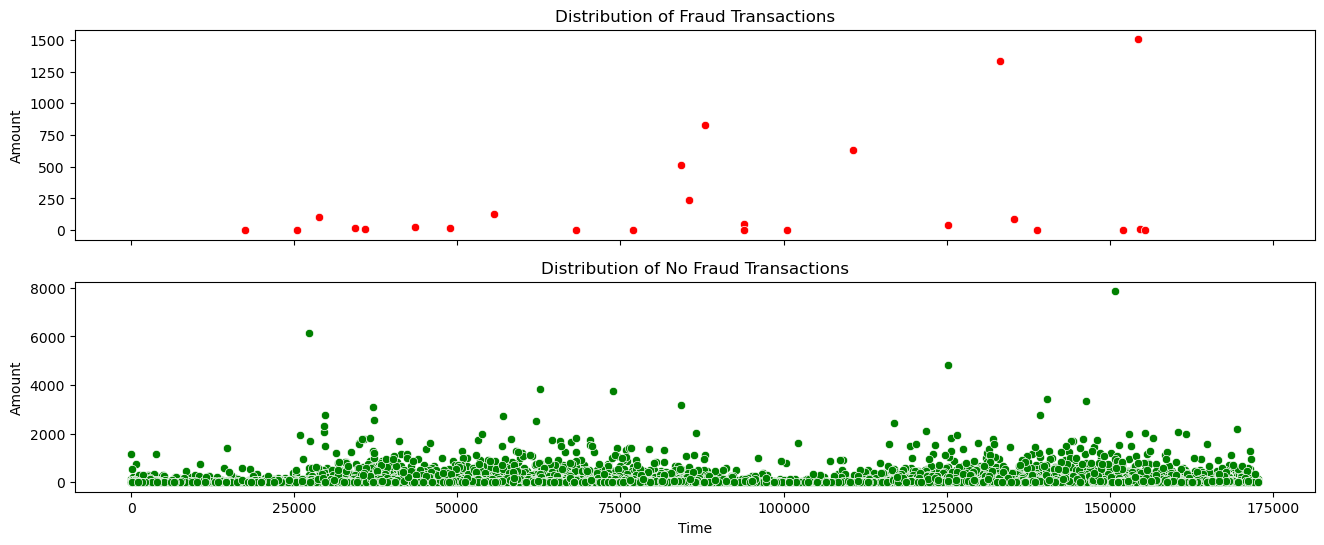

In [36]:
fig, axs = plt.subplots(nrows=2,sharex=True,figsize=(16,6))

sns.scatterplot(x='Time',y='Amount', data=is_fraud, ax=axs[0],color="red")
axs[0].set_title("Distribution of Fraud Transactions")

sns.scatterplot(x='Time',y='Amount', data=no_fraud, ax=axs[1],color="green")
axs[1].set_title("Distribution of No Fraud Transactions")

plt.show()

**Observation**

It is observed that there is a wide varation between the different points in the fraud dataset. However, the no fraud dataset have little varation between the data points, except points with amount greater than 2500. 

## **Data-preprocessing-for-modelling**

### **Seperating target variable and predictors**

In [37]:
#predictor
X = sample_df.drop("Class", axis=1)

#target variable
y = sample_df["Class"]

In [38]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
104697,69195.0,1.054379,-0.764756,0.160168,0.665587,1.113466,4.771656,-1.536609,1.306483,1.565054,...,0.050995,-0.097138,-0.029759,-0.171596,1.047201,0.698595,-0.217939,0.101970,0.040152,56.42
134356,80769.0,-4.805134,4.351191,-0.916135,-0.900752,-0.870777,-0.782946,0.328104,0.582501,2.749336,...,2.160193,-0.854486,-0.758266,0.147005,-0.021274,0.552660,0.008318,0.431835,-0.436239,9.82
42637,41182.0,-1.549833,-0.261143,1.556289,-2.037817,-0.366315,-1.334314,0.165406,-0.025782,-1.472751,...,-0.347365,-0.405656,-0.951005,-0.147752,0.424100,0.081845,1.103559,-0.502271,-0.248822,46.08
882,666.0,0.216344,0.663182,1.303520,0.169219,-0.404266,-0.517288,-0.036938,-0.838221,-0.528675,...,-0.184929,0.552788,-0.961206,-0.014642,0.525962,0.750877,0.141543,0.045107,0.127321,3.58
263275,160870.0,-0.273365,0.825649,0.555674,0.384915,1.343842,1.984159,0.321808,0.510275,-0.891463,...,0.172188,0.346482,1.162889,-0.557535,-0.896146,0.503553,0.555129,0.129099,0.047571,2.84


In [39]:
y.head()

104697    0
134356    0
42637     0
882       0
263275    0
Name: Class, dtype: int64

### **Splitting the data into train_set and test_set**

In [40]:
#split 80 - 20. 80 for training and 20 for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state=42)

### **Checking whether the target variable is balanced or not**

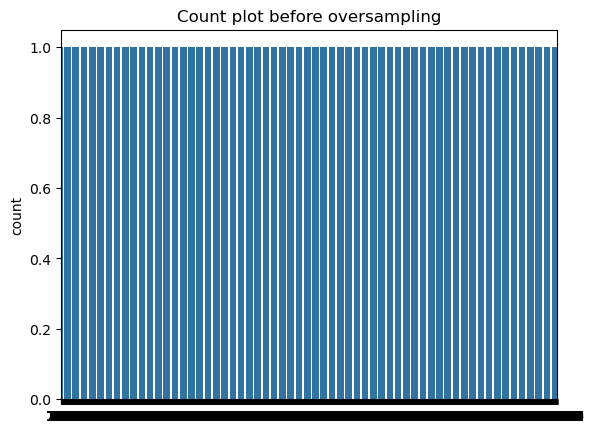

In [41]:
sns.countplot(y_train)
plt.title('Count plot before oversampling')
plt.show()

**Observation**

The graph above shows that the class target variable is highly imbalanced. Building a model with imbalanced data can lead to bias towards the class target variable with higher variables.

When dealing with imbalance data, accuracy is not necessarily the appropriate metric. Therefore, accuracy would not be a useful criterion for evaluating the effectiveness of models developed using this data.

In this situation, alternative metrics must be used, or the data must be balanced statistically. It is highly recommended to balance the data to avoid bias.

In [42]:
# Quick sanity check with the shapes of Training and testing datasets
print("X_train - ",X_train.shape)
print("y_train - ",y_train.shape)
print("X_test - ",X_test.shape)
print("y_test - ",y_test.shape)

X_train -  (11348, 30)
y_train -  (11348,)
X_test -  (2838, 30)
y_test -  (2838,)


### **Correcting imbalance data**

When we talk about imbalanced data, we usually mean a classification issue where the classes are not equally represented. When classifiers are applied to the dataset, everything is likely to be predicted as belonging to the dominant class. This is frequently considered a challenge when learning from severely unbalanced datasets.

**Techniques** used to correct the imbalanced dataset include:

1. Random Oversampling Technique
2. Synthetic Minority OverSampling Technique (SMOTE)
3. Adaptive Synthetic Sampling Method for Imbalanced Data (ADASYN)

**Inistantiating Sampling Technique**

In [43]:
#Instantiating ROS
ros = RandomOverSampler(random_state = 42)
X_train_ros, y_train_ros = ros.fit_resample(X_train,y_train)

print("Before RandomOverSampler:", Counter(y_train))
print("After RandomOverSampler:", Counter(y_train_ros))

Before RandomOverSampler: Counter({0: 11328, 1: 20})
After RandomOverSampler: Counter({0: 11328, 1: 11328})


In [44]:
#Instantiating SMOTE
smote = SMOTE(random_state = 42)
X_train_smote, y_train_smote = smote.fit_resample(X_train,y_train)

print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_smote))

Before SMOTE: Counter({0: 11328, 1: 20})
After SMOTE: Counter({0: 11328, 1: 11328})


In [45]:
#Instantiating ADASYN
adasyn = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train,y_train)

print("Before ADASYN:", Counter(y_train))
print("After ADASYN:", Counter(y_train_smote))

Before ADASYN: Counter({0: 11328, 1: 20})
After ADASYN: Counter({0: 11328, 1: 11328})


## **Building of Model**

**Models**

1. K nearest neighbors
2. Logistic regression
3. SVC or SVM
4. Decision trees
5. Voting Classifier
6. Bagging (Boostrap Aggregation)
7. Random forest
8. AdaBoost
9. Gradient boost

**In order to optimize the models, gridsearch with cross validation is applied to tune the hyperparameters of the different algorithms. Then, we test the balanced dataset's performance once more with the best parameters.**

### **1. K Nearest Neighbors**

**1.1 Hyperparameter tuning for KNN using ADASYN**

In [46]:
#Instantiating the model and setting up grid
steps = [('scaler', StandardScaler()),('knn',KNeighborsClassifier())]
pipeline =Pipeline(steps)
parameters ={'knn__n_neighbors': np.arange(1,35)}
grid_knn = GridSearchCV(pipeline,param_grid=parameters,cv=5, scoring="f1")

#Fitting the model with X_train, y_train
grid_knn.fit(X_train_adasyn,y_train_adasyn)

#checking for the test score, best parameters and cross-validation accuracies
print('Best cross-validation acuracy: {:.2f}'.format(grid_knn.best_score_))
print('Best test score: {:.2f}'.format(grid_knn.score(X_test,y_test)))
print('Best parameters:',grid_knn.best_params_)

Best cross-validation acuracy: 1.00
Best test score: 0.59
Best parameters: {'knn__n_neighbors': 11}


**1.2 KNN with Random OverSampling Technique**

In [47]:
#Instantiating a pipeline
steps = [('scaler', StandardScaler()),('knn',KNeighborsClassifier(n_neighbors=11))]
pipeline =Pipeline(steps)

#Fitting the model with X_train_ros, y_train_ros
pipeline.fit(X_train_ros, y_train_ros)
knn_y_pred_ros = pipeline.predict(X_test)

#checking for the test and train accuracies
print("Test score:{:.2f}".format(pipeline.score(X_test,y_test)))
print("Train score:{:.2f}\n".format(pipeline.score(X_train_ros,y_train_ros)))

# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, knn_y_pred_ros))
print("Confusion matrix:\n",confusion_matrix(y_true=y_test, y_pred=knn_y_pred_ros))

print("\n")
# Obtain metrics
print('Accuracy :{0:0.2f}'.format(accuracy_score(knn_y_pred_ros , y_test))) 
print('AUC : {0:0.2f}'.format(roc_auc_score(y_test , knn_y_pred_ros)))
print('Precision : {0:0.2f}'.format(precision_score(y_test , knn_y_pred_ros)))
print('Recall : {0:0.2f}'.format(recall_score(y_test , knn_y_pred_ros)))
print('F1 : {0:0.2f}'.format(f1_score(y_test , knn_y_pred_ros)))
print("\n")

Test score:1.00
Train score:1.00

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2833
           1       0.50      0.60      0.55         5

    accuracy                           1.00      2838
   macro avg       0.75      0.80      0.77      2838
weighted avg       1.00      1.00      1.00      2838

Confusion matrix:
 [[2830    3]
 [   2    3]]


Accuracy :1.00
AUC : 0.80
Precision : 0.50
Recall : 0.60
F1 : 0.55




**1.3 KNN with SMOTE Technique**

In [48]:
#Instantiating the model with best parameter
steps = [('scaler', StandardScaler()),('knn',KNeighborsClassifier(n_neighbors=11))]
pipeline =Pipeline(steps)

#Fitting the model with X_train_smote, y_train_smote
pipeline.fit(X_train_smote, y_train_smote)
knn_y_pred_smote = pipeline.predict(X_test)

#checking for the test and train accuracies
print("Test score:{:.2f}".format(pipeline.score(X_test,y_test)))
print("Train score:{:.2f}\n".format(pipeline.score(X_train_smote,y_train_smote)))

# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, knn_y_pred_smote))
print("Confusion matrix:\n",confusion_matrix(y_true=y_test, y_pred=knn_y_pred_smote))

print("\n")
# Obtain metrics
print('Accuracy :{0:0.2f}'.format(accuracy_score(knn_y_pred_smote , y_test))) 
print('AUC : {0:0.2f}'.format(roc_auc_score(y_test , knn_y_pred_smote)))
print('Precision : {0:0.2f}'.format(precision_score(y_test , knn_y_pred_smote)))
print('Recall : {0:0.2f}'.format(recall_score(y_test , knn_y_pred_smote)))
print('F1 : {0:0.2f}'.format(f1_score(y_test , knn_y_pred_smote)))
print("\n")

Test score:1.00
Train score:1.00

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2833
           1       0.42      1.00      0.59         5

    accuracy                           1.00      2838
   macro avg       0.71      1.00      0.79      2838
weighted avg       1.00      1.00      1.00      2838

Confusion matrix:
 [[2826    7]
 [   0    5]]


Accuracy :1.00
AUC : 1.00
Precision : 0.42
Recall : 1.00
F1 : 0.59




**1.4 KNN with ADASYN Technique**

In [49]:
#Instantiating the model with best parameter
steps = [('scaler', StandardScaler()),('knn',KNeighborsClassifier(n_neighbors=11))]
pipeline =Pipeline(steps)

#Fitting the model with X_train_adasyn, y_train_adasyn
pipeline.fit(X_train_adasyn, y_train_adasyn)
knn_y_pred_adasyn = pipeline.predict(X_test)

#checking for the test and train accuracies
print("Test score:{:.2f}".format(pipeline.score(X_test,y_test)))
print("Train score:{:.2f}\n".format(pipeline.score(X_train_adasyn,y_train_adasyn)))

# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, knn_y_pred_adasyn))
print("Confusion matrix:\n",confusion_matrix(y_true=y_test, y_pred=knn_y_pred_adasyn))

print("\n")
# Obtain metrics
print('Accuracy :{0:0.2f}'.format(accuracy_score(knn_y_pred_adasyn , y_test))) 
print('AUC : {0:0.2f}'.format(roc_auc_score(y_test , knn_y_pred_adasyn)))
print('Precision : {0:0.2f}'.format(precision_score(y_test , knn_y_pred_adasyn)))
print('Recall : {0:0.2f}'.format(recall_score(y_test , knn_y_pred_adasyn)))
print('F1 : {0:0.2f}'.format(f1_score(y_test , knn_y_pred_adasyn)))
print("\n")

Test score:1.00
Train score:1.00

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2833
           1       0.42      1.00      0.59         5

    accuracy                           1.00      2838
   macro avg       0.71      1.00      0.79      2838
weighted avg       1.00      1.00      1.00      2838

Confusion matrix:
 [[2826    7]
 [   0    5]]


Accuracy :1.00
AUC : 1.00
Precision : 0.42
Recall : 1.00
F1 : 0.59




### **2. Logistic regression**

**2.1 Hyperparameter tuning for Logistic Regression using SMOTE**

In [50]:
#Instantiating the model and setting up grid
steps = [('scaler', StandardScaler()),('lr',LogisticRegression())]
pipeline =Pipeline(steps)

param_grid = {'lr__C': [100, 10, 1.0, 0.1, 0.01], 'lr__class_weight': [None,'balanced']}
grid_logit = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring = 'f1', n_jobs=-1)

#Fitting the model with X_train, y_train
grid_logit.fit(X_train_smote,y_train_smote)

#checking for the test score, best parameters and cross-validation accuracies
print('Best cross-validation acuracy: {:.2f}'.format(grid_logit.best_score_))
print('Best test score: {:.2f}'.format(grid_logit.score(X_test,y_test)))
print('Best parameters:',grid_logit.best_params_)

Best cross-validation acuracy: 1.00
Best test score: 0.59
Best parameters: {'lr__C': 100, 'lr__class_weight': None}


**2.2 Logistic Regression with Random Oversampling Technique**

In [51]:
#Instantiating the model with best parameters
steps = [('scaler', StandardScaler()),('logit',LogisticRegression(C=100, class_weight=None))]
pipeline =Pipeline(steps)

#Fitting the model with X_train_ros, y_train_ros
pipeline.fit(X_train_ros, y_train_ros)
logit_y_pred_ros = pipeline.predict(X_test)

#checking for the test and train accuracies
print("Test score:{:.2f}".format(pipeline.score(X_test,y_test)))
print("Train score:{:.2f}\n".format(pipeline.score(X_train_ros,y_train_ros)))

# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, logit_y_pred_ros))
print("Confusion matrix:\n",confusion_matrix(y_true=y_test, y_pred=logit_y_pred_ros))

print("\n")
# Obtain metrics
print('Accuracy :{0:0.2f}'.format(accuracy_score(logit_y_pred_ros , y_test))) 
print('AUC : {0:0.2f}'.format(roc_auc_score(y_test ,logit_y_pred_ros)))
print('Precision : {0:0.2f}'.format(precision_score(y_test , logit_y_pred_ros)))
print('Recall : {0:0.2f}'.format(recall_score(y_test , logit_y_pred_ros)))
print('F1 : {0:0.2f}'.format(f1_score(y_test , logit_y_pred_ros)))
print("\n")

Test score:1.00
Train score:1.00

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2833
           1       0.42      1.00      0.59         5

    accuracy                           1.00      2838
   macro avg       0.71      1.00      0.79      2838
weighted avg       1.00      1.00      1.00      2838

Confusion matrix:
 [[2826    7]
 [   0    5]]


Accuracy :1.00
AUC : 1.00
Precision : 0.42
Recall : 1.00
F1 : 0.59




**2.3 Logistic Regression with SMOTE Technique**

In [52]:
#Instantiating the model with best parameters
steps = [('scaler', StandardScaler()),('logit',LogisticRegression(C=100, class_weight=None))]
pipeline =Pipeline(steps)

#Fitting the model with X_train_smote, y_train_smote
pipeline.fit(X_train_smote, y_train_smote)
logit_y_pred_smote = pipeline.predict(X_test)

#checking for the test and train accuracies
print("Test score:{:.2f}".format(pipeline.score(X_test,y_test)))
print("Train score:{:.2f}\n".format(pipeline.score(X_train_smote,y_train_smote)))

# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, logit_y_pred_smote))
print("Confusion matrix:\n",confusion_matrix(y_true=y_test, y_pred=logit_y_pred_smote))

print("\n")
# Obtain metrics
print('Accuracy :{0:0.2f}'.format(accuracy_score(logit_y_pred_smote, y_test))) 
print('AUC : {0:0.2f}'.format(roc_auc_score(y_test , logit_y_pred_smote)))
print('Precision : {0:0.2f}'.format(precision_score(y_test , logit_y_pred_smote)))
print('Recall : {0:0.2f}'.format(recall_score(y_test , logit_y_pred_smote)))
print('F1 : {0:0.2f}'.format(f1_score(y_test , logit_y_pred_smote)))
print("\n")

Test score:1.00
Train score:1.00

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2833
           1       0.42      1.00      0.59         5

    accuracy                           1.00      2838
   macro avg       0.71      1.00      0.79      2838
weighted avg       1.00      1.00      1.00      2838

Confusion matrix:
 [[2826    7]
 [   0    5]]


Accuracy :1.00
AUC : 1.00
Precision : 0.42
Recall : 1.00
F1 : 0.59




**2.4 Logistic Regression with ADASYN Technique**

In [53]:
#Instantiating the model with best parameters
steps = [('scaler', StandardScaler()),('logit',LogisticRegression(C=100, class_weight=None))]
pipeline =Pipeline(steps)

#Fitting the model with X_train_ros, y_train_rose
pipeline.fit(X_train_adasyn, y_train_adasyn)
logit_y_pred_adasyn = pipeline.predict(X_test)

#checking for the test and train accuracies
print("Test score:{:.2f}".format(pipeline.score(X_test,y_test)))
print("Train score:{:.2f}\n".format(pipeline.score(X_train_adasyn,y_train_adasyn)))

# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, logit_y_pred_adasyn))
print("Confusion matrix:\n",confusion_matrix(y_true=y_test, y_pred=logit_y_pred_adasyn))

print("\n")
# Obtain metrics
print('Accuracy :{0:0.2f}'.format(accuracy_score(logit_y_pred_adasyn , y_test))) 
print('AUC : {0:0.2f}'.format(roc_auc_score(y_test , logit_y_pred_adasyn)))
print('Precision : {0:0.2f}'.format(precision_score(y_test , logit_y_pred_adasyn)))
print('Recall : {0:0.2f}'.format(recall_score(y_test , logit_y_pred_adasyn)))
print('F1 : {0:0.2f}'.format(f1_score(y_test , logit_y_pred_adasyn)))
print("\n")

Test score:1.00
Train score:1.00

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2833
           1       0.42      1.00      0.59         5

    accuracy                           1.00      2838
   macro avg       0.71      1.00      0.79      2838
weighted avg       1.00      1.00      1.00      2838

Confusion matrix:
 [[2826    7]
 [   0    5]]


Accuracy :1.00
AUC : 1.00
Precision : 0.42
Recall : 1.00
F1 : 0.59




### **3. Support Vector Machine**

**3.1 Hyperparameter tuning for Support Vector Classifier using SMOTE**

In [55]:
#Instantiating the model and setting up grid search
pipe = Pipeline([('Scaler',StandardScaler()),('SVC',SVC(probability=True))])
param_grid = {'SVC__C':[0.001,0.01,0.1,1,10],
            'SVC__gamma':[0.001,0.01,0.1,1,10]}
grid_svc = GridSearchCV(pipe, param_grid = param_grid,cv =5,scoring="f1")

#Fitting the model with X_train, y_train
grid_svc.fit(X_train_smote,y_train_smote)

#checking for the test score, best parameters and cross-validation accuracies
print('Best cross-validation acuracy: {:.2f}'.format(grid_svc.best_score_))
print('Best test score: {:.2f}'.format(grid_svc.score(X_test,y_test)))
print('Best parameters:',grid_svc.best_params_)

Best cross-validation acuracy: 1.00
Best test score: 0.00
Best parameters: {'SVC__C': 1, 'SVC__gamma': 1}


**3.2 Support Vector Classifier with Random Oversampling Technique**

In [56]:
#Instantiating the model with best parameters
pipeline = Pipeline([('Scaler',StandardScaler()),('SVC',SVC(C= 1,gamma =0.001,probability=True))])

#Fitting the model with X_train_ros, y_train_ros
pipeline.fit(X_train_ros, y_train_ros)
svc_y_pred_ros = pipeline.predict(X_test)

#checking for the test and train accuracies
print("Test score:{:.2f}".format(pipeline.score(X_test,y_test)))
print("Train score:{:.2f}\n".format(pipeline.score(X_train_ros,y_train_ros)))

# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, svc_y_pred_ros))
print("Confusion matrix:\n",confusion_matrix(y_true=y_test, y_pred=svc_y_pred_ros))

print("\n")
# Obtain metrics
print('Accuracy :{0:0.2f}'.format(accuracy_score(svc_y_pred_ros , y_test))) 
print('AUC : {0:0.2f}'.format(roc_auc_score(y_test ,svc_y_pred_ros)))
print('Precision : {0:0.2f}'.format(precision_score(y_test , svc_y_pred_ros)))
print('Recall : {0:0.2f}'.format(recall_score(y_test , svc_y_pred_ros)))
print('F1 : {0:0.2f}'.format(f1_score(y_test , svc_y_pred_ros)))
print("\n")

Test score:0.99
Train score:1.00

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      2833
           1       0.19      1.00      0.32         5

    accuracy                           0.99      2838
   macro avg       0.60      1.00      0.66      2838
weighted avg       1.00      0.99      1.00      2838

Confusion matrix:
 [[2812   21]
 [   0    5]]


Accuracy :0.99
AUC : 1.00
Precision : 0.19
Recall : 1.00
F1 : 0.32




**3.3 Support Vector Classifier with SMOTE Technique**

In [57]:
#Instantiating the model with best parameters
pipeline = Pipeline([('Scaler',StandardScaler()),('SVC',SVC(C= 1,gamma =0.001,probability=True))])

#Fitting the model with X_train_smote, y_train_smote
pipeline.fit(X_train_smote, y_train_smote)
svc_y_pred_smote = pipeline.predict(X_test)

#checking for the test and train accuracies
print("Test score:{:.2f}".format(pipeline.score(X_test,y_test)))
print("Train score:{:.2f}\n".format(pipeline.score(X_train_smote,y_train_smote)))

# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, svc_y_pred_smote))
print("Confusion matrix:\n",confusion_matrix(y_true=y_test, y_pred=svc_y_pred_smote))

print("\n")
# Obtain metrics
print('Accuracy :{0:0.2f}'.format(accuracy_score(svc_y_pred_smote , y_test))) 
print('AUC : {0:0.2f}'.format(roc_auc_score(y_test ,svc_y_pred_smote)))
print('Precision : {0:0.2f}'.format(precision_score(y_test , svc_y_pred_smote)))
print('Recall : {0:0.2f}'.format(recall_score(y_test , svc_y_pred_smote)))
print('F1 : {0:0.2f}'.format(f1_score(y_test , svc_y_pred_smote)))
print("\n")

Test score:1.00
Train score:1.00

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2833
           1       0.36      1.00      0.53         5

    accuracy                           1.00      2838
   macro avg       0.68      1.00      0.76      2838
weighted avg       1.00      1.00      1.00      2838

Confusion matrix:
 [[2824    9]
 [   0    5]]


Accuracy :1.00
AUC : 1.00
Precision : 0.36
Recall : 1.00
F1 : 0.53




**3.4 Support Vector Classifier with ADASYN Technique**

In [58]:
#Instantiating the model with best parameters
pipeline = Pipeline([('Scaler',StandardScaler()),('SVC',SVC(C= 1,gamma =0.001,probability=True))])

#Fitting the model with X_train_ros, y_train_rose
pipeline.fit(X_train_adasyn, y_train_adasyn)
svc_y_pred_adasyn = pipeline.predict(X_test)

#checking for the test and train accuracies
print("Test score:{:.2f}".format(pipeline.score(X_test,y_test)))
print("Train score:{:.2f}\n".format(pipeline.score(X_train_adasyn,y_train_adasyn)))

# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, svc_y_pred_adasyn))
print("Confusion matrix:\n",confusion_matrix(y_true=y_test, y_pred=svc_y_pred_adasyn))

print("\n")
# Obtain metrics
print('Accuracy :{0:0.2f}'.format(accuracy_score(svc_y_pred_adasyn , y_test))) 
print('AUC : {0:0.2f}'.format(roc_auc_score(y_test , svc_y_pred_adasyn)))
print('Precision : {0:0.2f}'.format(precision_score(y_test , svc_y_pred_adasyn)))
print('Recall : {0:0.2f}'.format(recall_score(y_test , svc_y_pred_adasyn)))
print('F1 : {0:0.2f}'.format(f1_score(y_test , svc_y_pred_adasyn)))
print("\n")

Test score:1.00
Train score:1.00

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2833
           1       0.36      1.00      0.53         5

    accuracy                           1.00      2838
   macro avg       0.68      1.00      0.76      2838
weighted avg       1.00      1.00      1.00      2838

Confusion matrix:
 [[2824    9]
 [   0    5]]


Accuracy :1.00
AUC : 1.00
Precision : 0.36
Recall : 1.00
F1 : 0.53




### **4. Decision Tree**

**4.1 Hyperparameter tuning for Decision Tree using SMOTE**

In [59]:
#Instantiating the model and setting up grid search
dt = DecisionTreeClassifier(random_state=42)
params_dt = {'max_depth': [3, 4,5, 6],'min_samples_leaf': [0.04, 0.06, 0.08],'max_features': [0.2, 0.4,0.6, 0.8]}
grid_tree = GridSearchCV(estimator=dt,param_grid=params_dt,scoring='f1',cv=5,n_jobs=-1)

#Fitting the model with X_train_smote, y_train_smote
grid_tree.fit(X_train_smote,y_train_smote)

#checking for the test score, best parameters and cross-validation accuracies
print('Best cross-validation acuracy: {:.2f}'.format(grid_tree.best_score_))
print('Best test score: {:.2f}'.format(grid_tree.score(X_test,y_test)))
print('Best parameters:',grid_tree.best_params_)

Best cross-validation acuracy: 0.97
Best test score: 0.14
Best parameters: {'max_depth': 3, 'max_features': 0.6, 'min_samples_leaf': 0.04}


**4.2 Decision Tree with Random Oversampling Technique**

In [60]:
#Instantiating the model with best parameters
tree= DecisionTreeClassifier(max_depth=3, min_samples_leaf=0.04, max_features=0.2)

#Fitting the model with X_train_ros, y_train_ros
tree.fit(X_train_ros, y_train_ros)
tree_y_pred_ros = tree.predict(X_test)

#checking for the test and train accuracies
print("Test score:{:.2f}".format(tree.score(X_test,y_test)))
print("Train score:{:.2f}\n".format(tree.score(X_train_ros,y_train_ros)))

# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, tree_y_pred_ros))
print("Confusion matrix:\n",confusion_matrix(y_true=y_test, y_pred=tree_y_pred_ros))

print("\n")
# Obtain metrics
print('Accuracy :{0:0.2f}'.format(accuracy_score(tree_y_pred_ros , y_test))) 
print('AUC : {0:0.2f}'.format(roc_auc_score(y_test ,tree_y_pred_ros)))
print('Precision : {0:0.2f}'.format(precision_score(y_test , tree_y_pred_ros)))
print('Recall : {0:0.2f}'.format(recall_score(y_test , tree_y_pred_ros)))
print('F1 : {0:0.2f}'.format(f1_score(y_test , tree_y_pred_ros)))
print("\n")

Test score:0.90
Train score:0.95

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      0.90      0.95      2833
           1       0.02      1.00      0.03         5

    accuracy                           0.90      2838
   macro avg       0.51      0.95      0.49      2838
weighted avg       1.00      0.90      0.95      2838

Confusion matrix:
 [[2554  279]
 [   0    5]]


Accuracy :0.90
AUC : 0.95
Precision : 0.02
Recall : 1.00
F1 : 0.03




**4.3 Decision Tree with SMOTE Technique**

In [61]:
#Instantiating the model with best parameters
tree= DecisionTreeClassifier(max_depth=3, min_samples_leaf=0.04, max_features=0.2)

#Fitting the model with X_train_smote, y_train_smote
tree.fit(X_train_smote, y_train_smote)
tree_y_pred_smote = tree.predict(X_test)

#checking for the test and train accuracies
print("Test score:{:.2f}".format(tree.score(X_test,y_test)))
print("Train score:{:.2f}\n".format(tree.score(X_train_smote,y_train_smote)))

# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, tree_y_pred_smote))
print("Confusion matrix:\n",confusion_matrix(y_true=y_test, y_pred=tree_y_pred_smote))

print("\n")
# Obtain metrics
print('Accuracy :{0:0.2f}'.format(accuracy_score(tree_y_pred_smote , y_test))) 
print('AUC : {0:0.2f}'.format(roc_auc_score(y_test ,tree_y_pred_smote)))
print('Precision : {0:0.2f}'.format(precision_score(y_test , tree_y_pred_smote)))
print('Recall : {0:0.2f}'.format(recall_score(y_test , tree_y_pred_smote)))
print('F1 : {0:0.2f}'.format(f1_score(y_test , tree_y_pred_smote)))
print("\n")

Test score:0.98
Train score:0.97

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      2833
           1       0.08      1.00      0.15         5

    accuracy                           0.98      2838
   macro avg       0.54      0.99      0.57      2838
weighted avg       1.00      0.98      0.99      2838

Confusion matrix:
 [[2778   55]
 [   0    5]]


Accuracy :0.98
AUC : 0.99
Precision : 0.08
Recall : 1.00
F1 : 0.15




**4.4 Support Vector Classifier with ADASYN Technique**

In [62]:
#Instantiating the model with best parameters
tree= DecisionTreeClassifier(max_depth=3, min_samples_leaf=0.04, max_features=0.2)

#Fitting the model with X_train_adasyn, y_train_adasyn
tree.fit(X_train_adasyn, y_train_adasyn)
tree_y_pred_adasyn = tree.predict(X_test)

#checking for the test and train accuracies
print("Test score:{:.2f}".format(tree.score(X_test,y_test)))
print("Train score:{:.2f}\n".format(tree.score(X_train_adasyn,y_train_adasyn)))

# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, tree_y_pred_adasyn))
print("Confusion matrix:\n",confusion_matrix(y_true=y_test, y_pred=tree_y_pred_adasyn))

print("\n")
# Obtain metrics
print('Accuracy :{0:0.2f}'.format(accuracy_score(tree_y_pred_adasyn , y_test))) 
print('AUC : {0:0.2f}'.format(roc_auc_score(y_test ,tree_y_pred_adasyn)))
print('Precision : {0:0.2f}'.format(precision_score(y_test , tree_y_pred_adasyn)))
print('Recall : {0:0.2f}'.format(recall_score(y_test , tree_y_pred_adasyn)))
print('F1 : {0:0.2f}'.format(f1_score(y_test , tree_y_pred_adasyn)))
print("\n")

Test score:0.97
Train score:0.97

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99      2833
           1       0.06      1.00      0.11         5

    accuracy                           0.97      2838
   macro avg       0.53      0.99      0.55      2838
weighted avg       1.00      0.97      0.98      2838

Confusion matrix:
 [[2752   81]
 [   0    5]]


Accuracy :0.97
AUC : 0.99
Precision : 0.06
Recall : 1.00
F1 : 0.11




### **5. Random Forest**

**5.1 Hyperparameter tuning for Random Forest using SMOTE**

In [63]:
#Instantiating the model and setting up grid search
rf = RandomForestClassifier(random_state = 42)
param_grid = {'max_features': [1,2,3,4,5,6,7,8,9,10],
              'max_leaf_nodes':[1,2, 3,4,5,6,7,8,9,10]}
grid_rfc = GridSearchCV(rf, param_grid = param_grid,cv =5,scoring = 'f1', n_jobs=-1)

#Fitting the model with X_train_smote, y_train_smote
grid_rfc.fit(X_train_smote,y_train_smote)

#checking for the test score, best parameters and cross-validation accuracies
print('Best cross-validation acuracy: {:.2f}'.format(grid_rfc.best_score_))
print('Best test score: {:.2f}'.format(grid_rfc.score(X_test,y_test)))
print('Best parameters:',grid_rfc.best_params_)

Best cross-validation acuracy: 1.00
Best test score: 0.91
Best parameters: {'max_features': 8, 'max_leaf_nodes': 10}


**5.2 Random Forest Random Oversampling Technique**

In [64]:
#Instantiating the model with best parameters
rfc = RandomForestClassifier(max_features = 9, max_leaf_nodes =7, random_state = 42)

#Fitting the model with X_train_ros, y_train_ros
rfc.fit(X_train_ros, y_train_ros)
rfc_y_pred_ros = rfc.predict(X_test)

#checking for the test and train accuracies
print("Test score:{:.2f}".format(rfc.score(X_test,y_test)))
print("Train score:{:.2f}\n".format(rfc.score(X_train_ros,y_train_ros)))

# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, rfc_y_pred_ros))
print("Confusion matrix:\n",confusion_matrix(y_true=y_test, y_pred=rfc_y_pred_ros))

print("\n")
# Obtain metrics
print('Accuracy :{0:0.2f}'.format(accuracy_score(rfc_y_pred_ros , y_test))) 
print('AUC : {0:0.2f}'.format(roc_auc_score(y_test ,rfc_y_pred_ros)))
print('Precision : {0:0.2f}'.format(precision_score(y_test , rfc_y_pred_ros)))
print('Recall : {0:0.2f}'.format(recall_score(y_test , rfc_y_pred_ros)))
print('F1 : {0:0.2f}'.format(f1_score(y_test , rfc_y_pred_ros)))
print("\n")

Test score:1.00
Train score:1.00

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2833
           1       0.83      1.00      0.91         5

    accuracy                           1.00      2838
   macro avg       0.92      1.00      0.95      2838
weighted avg       1.00      1.00      1.00      2838

Confusion matrix:
 [[2832    1]
 [   0    5]]


Accuracy :1.00
AUC : 1.00
Precision : 0.83
Recall : 1.00
F1 : 0.91




**5.3 Random Forest SMOTE Technique**

In [65]:
#Instantiating the model with best parameters
rfc = RandomForestClassifier(max_features = 9, max_leaf_nodes =7, random_state = 42)

#Fitting the model with X_train_smote, y_train_smote
rfc.fit(X_train_smote, y_train_smote)
rfc_y_pred_smote = rfc.predict(X_test)

#checking for the test and train accuracies
print("Test score:{:.2f}".format(rfc.score(X_test,y_test)))
print("Train score:{:.2f}\n".format(rfc.score(X_train_smote,y_train_smote)))

# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, rfc_y_pred_smote))
print("Confusion matrix:\n",confusion_matrix(y_true=y_test, y_pred=rfc_y_pred_smote))

print("\n")
# Obtain metrics
print('Accuracy :{0:0.2f}'.format(accuracy_score(rfc_y_pred_smote , y_test))) 
print('AUC : {0:0.2f}'.format(roc_auc_score(y_test ,rfc_y_pred_smote)))
print('Precision : {0:0.2f}'.format(precision_score(y_test , rfc_y_pred_smote)))
print('Recall : {0:0.2f}'.format(recall_score(y_test , rfc_y_pred_smote)))
print('F1 : {0:0.2f}'.format(f1_score(y_test , rfc_y_pred_smote)))
print("\n")

Test score:1.00
Train score:1.00

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2833
           1       0.56      1.00      0.71         5

    accuracy                           1.00      2838
   macro avg       0.78      1.00      0.86      2838
weighted avg       1.00      1.00      1.00      2838

Confusion matrix:
 [[2829    4]
 [   0    5]]


Accuracy :1.00
AUC : 1.00
Precision : 0.56
Recall : 1.00
F1 : 0.71




**5.4 Random Forest ADASYN Technique**

In [66]:
#Instantiating the model with best parameters
rfc = RandomForestClassifier(max_features = 9, max_leaf_nodes =7, random_state = 42)

#Fitting the model with X_train_adasyn, y_train_adasyn
rfc.fit(X_train_adasyn, y_train_adasyn)
rfc_y_pred_adasyn = rfc.predict(X_test)

#checking for the test and train accuracies
print("Test score:{:.2f}".format(rfc.score(X_test,y_test)))
print("Train score:{:.2f}\n".format(rfc.score(X_train_adasyn,y_train_adasyn)))

# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, rfc_y_pred_adasyn))
print("Confusion matrix:\n",confusion_matrix(y_true=y_test, y_pred=rfc_y_pred_adasyn))

print("\n")
# Obtain metrics
print('Accuracy :{0:0.2f}'.format(accuracy_score(rfc_y_pred_adasyn , y_test))) 
print('AUC : {0:0.2f}'.format(roc_auc_score(y_test ,rfc_y_pred_adasyn)))
print('Precision : {0:0.2f}'.format(precision_score(y_test , rfc_y_pred_adasyn)))
print('Recall : {0:0.2f}'.format(recall_score(y_test , rfc_y_pred_adasyn)))
print('F1 : {0:0.2f}'.format(f1_score(y_test , rfc_y_pred_adasyn)))
print("\n")

Test score:1.00
Train score:1.00

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2833
           1       0.50      1.00      0.67         5

    accuracy                           1.00      2838
   macro avg       0.75      1.00      0.83      2838
weighted avg       1.00      1.00      1.00      2838

Confusion matrix:
 [[2828    5]
 [   0    5]]


Accuracy :1.00
AUC : 1.00
Precision : 0.50
Recall : 1.00
F1 : 0.67




### **6. Bagging (Boostrap Aggregation)**
bagging (bootstrap aggregation) uses a technique known as the bootstrap, where the ensemble is formed by models that use the same training data. These models are not trained on the entire training set. Instead, each model is trained on a different subset of the data. Overall, Bagging has the effect of reducing the variance of individual models in the ensemble.
In the training phase, bagging consists of drawing N different bootstrap samples from the training set. Each of these bootstrap samples are then used to train N models that use the same algorithm
We will instantiate DecisionTreeClassifier as our base estimator.

**6.1 Bagging with Random Oversampling Technique**

In [68]:
# instantiate a base model as DecisionTreeClassifier and Bagging classifier
dt = DecisionTreeClassifier(random_state =123)
bc = BaggingClassifier(base_estimator=dt,n_estimators=400,n_jobs = -1)
# fit model on training data
bc.fit(X_train_ros,y_train_ros)

# predict model and calculate accuracy
bc_y_pred_ros = bc.predict(X_test)


#checking for the test and train accuracies
print("Test score:{:.2f}".format(bc.score(X_test,y_test)))
print("Train score:{:.2f}\n".format(bc.score(X_train_ros,y_train_ros)))

# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, bc_y_pred_ros))
print("Confusion matrix:\n",confusion_matrix(y_true=y_test, y_pred=bc_y_pred_ros))

print("\n")
# Obtain metrics
print('Accuracy :{0:0.2f}'.format(accuracy_score(bc_y_pred_ros , y_test))) 
print('AUC : {0:0.2f}'.format(roc_auc_score(y_test ,bc_y_pred_ros)))
print('Precision : {0:0.2f}'.format(precision_score(y_test , bc_y_pred_ros)))
print('Recall : {0:0.2f}'.format(recall_score(y_test , bc_y_pred_ros)))
print('F1 : {0:0.2f}'.format(f1_score(y_test , bc_y_pred_ros)))
print("\n")

TypeError: BaggingClassifier.__init__() got an unexpected keyword argument 'base_estimator'

In [69]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score,
    roc_auc_score, precision_score, recall_score, f1_score
)

# Instantiate a base model (Decision Tree) and Bagging Classifier
dt = DecisionTreeClassifier(random_state=123)
bc = BaggingClassifier(estimator=dt, n_estimators=400, n_jobs=-1, random_state=123)

# Fit model on training data
bc.fit(X_train_ros, y_train_ros)

# Predict on test data
bc_y_pred_ros = bc.predict(X_test)

# Evaluate model
print("Test score: {:.2f}".format(bc.score(X_test, y_test)))
print("Train score: {:.2f}\n".format(bc.score(X_train_ros, y_train_ros)))

# Classification report and confusion matrix
print('Classification report:\n', classification_report(y_test, bc_y_pred_ros))
print("Confusion matrix:\n", confusion_matrix(y_true=y_test, y_pred=bc_y_pred_ros))
print("\n")

# Additional metrics
print('Accuracy  : {:.2f}'.format(accuracy_score(y_test, bc_y_pred_ros))) 
print('AUC       : {:.2f}'.format(roc_auc_score(y_test, bc_y_pred_ros)))
print('Precision : {:.2f}'.format(precision_score(y_test, bc_y_pred_ros)))
print('Recall    : {:.2f}'.format(recall_score(y_test, bc_y_pred_ros)))
print('F1 Score  : {:.2f}'.format(f1_score(y_test, bc_y_pred_ros)))


Test score: 1.00
Train score: 1.00

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2833
           1       0.71      1.00      0.83         5

    accuracy                           1.00      2838
   macro avg       0.86      1.00      0.92      2838
weighted avg       1.00      1.00      1.00      2838

Confusion matrix:
 [[2831    2]
 [   0    5]]


Accuracy  : 1.00
AUC       : 1.00
Precision : 0.71
Recall    : 1.00
F1 Score  : 0.83


**6.2 Bagging with SMOTE Technique**

In [71]:
# Instantiate a base model and Bagging Classifier
dt = DecisionTreeClassifier(random_state=123)
bc = BaggingClassifier(estimator=dt, n_estimators=400, n_jobs=-1, random_state=123)

# Fit model on training data (SMOTE-balanced)
bc.fit(X_train_smote, y_train_smote)

# Predict on test data
bc_y_pred_smote = bc.predict(X_test)

# Check model performance on training and test data
print("Test score: {:.2f}".format(bc.score(X_test, y_test)))
print("Train score: {:.2f}\n".format(bc.score(X_train_smote, y_train_smote)))

# Classification report and confusion matrix
print('Classification Report:\n', classification_report(y_test, bc_y_pred_smote))
print("Confusion Matrix:\n", confusion_matrix(y_true=y_test, y_pred=bc_y_pred_smote))
print("\n")

# Additional performance metrics
print('Accuracy  : {:.2f}'.format(accuracy_score(y_test, bc_y_pred_smote)))
print('AUC       : {:.2f}'.format(roc_auc_score(y_test, bc_y_pred_smote)))
print('Precision : {:.2f}'.format(precision_score(y_test, bc_y_pred_smote)))
print('Recall    : {:.2f}'.format(recall_score(y_test, bc_y_pred_smote)))
print('F1 Score  : {:.2f}'.format(f1_score(y_test, bc_y_pred_smote)))
print("\n")


Test score: 1.00
Train score: 1.00

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2833
           1       0.83      1.00      0.91         5

    accuracy                           1.00      2838
   macro avg       0.92      1.00      0.95      2838
weighted avg       1.00      1.00      1.00      2838

Confusion Matrix:
 [[2832    1]
 [   0    5]]


Accuracy  : 1.00
AUC       : 1.00
Precision : 0.83
Recall    : 1.00
F1 Score  : 0.91




**6.3 Bagging with ADASYN Technique**

In [72]:
# instantiate a base model as DecisionTreeClassifier and Bagging classifier
dt = DecisionTreeClassifier(random_state =123)
bc = BaggingClassifier(estimator=dt,n_estimators=400,n_jobs = -1)
# fit model on training data
bc.fit(X_train_adasyn,y_train_adasyn)

# predict model and calculate accuracy
bc_y_pred_adasyn = bc.predict(X_test)


#checking for the test and train accuracies
print("Test score:{:.2f}".format(bc.score(X_test,y_test)))
print("Train score:{:.2f}\n".format(bc.score(X_train_adasyn,y_train_adasyn)))

# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, bc_y_pred_adasyn))
print("Confusion matrix:\n",confusion_matrix(y_true=y_test, y_pred=bc_y_pred_adasyn))

print("\n")
# Obtain metrics
print('Accuracy :{0:0.2f}'.format(accuracy_score(bc_y_pred_adasyn , y_test))) 
print('AUC : {0:0.2f}'.format(roc_auc_score(y_test ,bc_y_pred_adasyn)))
print('Precision : {0:0.2f}'.format(precision_score(y_test , bc_y_pred_adasyn)))
print('Recall : {0:0.2f}'.format(recall_score(y_test , bc_y_pred_adasyn)))
print('F1 : {0:0.2f}'.format(f1_score(y_test , bc_y_pred_adasyn)))
print("\n")

Test score:1.00
Train score:1.00

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2833
           1       0.71      1.00      0.83         5

    accuracy                           1.00      2838
   macro avg       0.86      1.00      0.92      2838
weighted avg       1.00      1.00      1.00      2838

Confusion matrix:
 [[2831    2]
 [   0    5]]


Accuracy :1.00
AUC : 1.00
Precision : 0.71
Recall : 1.00
F1 : 0.83




Out of bag evaluation. In bagging, some instances may be sampled several times for one model while others may not be sampled at all. The instances that are not sampled are called out of bag instances. Since OOB instances are not seen by a model during training, these can be used to estimate the performance of the ensemble without the need for cross-validation. This method is called out of bag evaluation(OOB evaluation).
Finally, evaluate the OOB-accuracy of bc by extracting the attribute oob_score_ from the trained instance

**6.4 Out Of Bagging with Random Oversampling Technique**

In [73]:
# instantiate a base model as DecisionTreeClassifier and Bagging classifier. 
#Add parameter oob_score to True in order to evaluate the OOB-accuracy of bc after training.
dt = DecisionTreeClassifier(random_state =123)
bc = BaggingClassifier(estimator=dt,n_estimators=400,n_jobs = -1, oob_score=True)
# fit model on training data
bc.fit(X_train_ros,y_train_ros)

# predict model and calculate accuracy
y_pred_oob_ros = bc.predict(X_test)
# Evaluate test set accuracy
test_accuracy = accuracy_score(y_test, y_pred_oob_ros)
# Extract the OOB accuracy from 'bc'
oob_accuracy = bc.oob_score_
# Print test set accuracy
print('Test set accuracy: {:.3f}'.format(test_accuracy))
# Print OOB accuracy
print('OOB accuracy: {:.3f}'.format(oob_accuracy))

# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, y_pred_oob_ros))
print("Confusion matrix:\n",confusion_matrix(y_true=y_test, y_pred=y_pred_oob_ros))

print("\n")
# Obtain metrics
print('Accuracy :{0:0.2f}'.format(accuracy_score(y_pred_oob_ros , y_test))) 
print('AUC : {0:0.2f}'.format(roc_auc_score(y_test ,y_pred_oob_ros)))
print('Precision : {0:0.2f}'.format(precision_score(y_test , y_pred_oob_ros)))
print('Recall : {0:0.2f}'.format(recall_score(y_test , y_pred_oob_ros)))
print('F1 : {0:0.2f}'.format(f1_score(y_test , y_pred_oob_ros)))
print("\n")

Test set accuracy: 0.999
OOB accuracy: 1.000
Classifcation report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2833
           1       0.67      0.80      0.73         5

    accuracy                           1.00      2838
   macro avg       0.83      0.90      0.86      2838
weighted avg       1.00      1.00      1.00      2838

Confusion matrix:
 [[2831    2]
 [   1    4]]


Accuracy :1.00
AUC : 0.90
Precision : 0.67
Recall : 0.80
F1 : 0.73




**6.5 Out of Bagging with SMOTE Technique**

In [74]:
# instantiate a base model as DecisionTreeClassifier and Bagging classifier. 
#Add parameter oob_score to True in order to evaluate the OOB-accuracy of bc after training.
dt = DecisionTreeClassifier(random_state =123)
bc = BaggingClassifier(estimator=dt,n_estimators=400,n_jobs = -1, oob_score=True)
# fit model on training data
bc.fit(X_train_smote,y_train_smote)

# predict model and calculate accuracy
y_pred_oob_smote = bc.predict(X_test)
# Evaluate test set accuracy
test_accuracy = accuracy_score(y_test, y_pred_oob_smote)
# Extract the OOB accuracy from 'bc'
oob_accuracy = bc.oob_score_
# Print test set accuracy
print('Test set accuracy: {:.3f}'.format(test_accuracy))
# Print OOB accuracy
print('OOB accuracy: {:.3f}'.format(oob_accuracy))

# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, y_pred_oob_smote))
print("Confusion matrix:\n",confusion_matrix(y_true=y_test, y_pred=y_pred_oob_smote))

print("\n")
# Obtain metrics
print('Accuracy :{0:0.2f}'.format(accuracy_score(y_pred_oob_smote , y_test))) 
print('AUC : {0:0.2f}'.format(roc_auc_score(y_test ,y_pred_oob_smote)))
print('Precision : {0:0.2f}'.format(precision_score(y_test , y_pred_oob_smote)))
print('Recall : {0:0.2f}'.format(recall_score(y_test , y_pred_oob_smote)))
print('F1 : {0:0.2f}'.format(f1_score(y_test , y_pred_oob_smote)))
print("\n")

Test set accuracy: 1.000
OOB accuracy: 1.000
Classifcation report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2833
           1       0.83      1.00      0.91         5

    accuracy                           1.00      2838
   macro avg       0.92      1.00      0.95      2838
weighted avg       1.00      1.00      1.00      2838

Confusion matrix:
 [[2832    1]
 [   0    5]]


Accuracy :1.00
AUC : 1.00
Precision : 0.83
Recall : 1.00
F1 : 0.91




**6.6 Out of Bagging with ADASYN Technique**

In [75]:
# instantiate a base model as DecisionTreeClassifier and Bagging classifier. 
#Add parameter oob_score to True in order to evaluate the OOB-accuracy of bc after training.
dt = DecisionTreeClassifier(random_state =123)
bc = BaggingClassifier(estimator=dt,n_estimators=400,n_jobs = -1, oob_score=True)
# fit model on training data
bc.fit(X_train_adasyn,y_train_adasyn)

# predict model and calculate accuracy
y_pred_oob_adasyn = bc.predict(X_test)
# Evaluate test set accuracy
test_accuracy = accuracy_score(y_test, y_pred_oob_adasyn)
# Extract the OOB accuracy from 'bc'
oob_accuracy = bc.oob_score_
# Print test set accuracy
print('Test set accuracy: {:.3f}'.format(test_accuracy))
# Print OOB accuracy
print('OOB accuracy: {:.3f}'.format(oob_accuracy))

# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, y_pred_oob_adasyn))
print("Confusion matrix:\n",confusion_matrix(y_true=y_test, y_pred=y_pred_oob_adasyn))

print("\n")
# Obtain metrics
print('Accuracy :{0:0.2f}'.format(accuracy_score(y_pred_oob_adasyn , y_test))) 
print('AUC : {0:0.2f}'.format(roc_auc_score(y_test ,y_pred_oob_adasyn)))
print('Precision : {0:0.2f}'.format(precision_score(y_test , y_pred_oob_adasyn)))
print('Recall : {0:0.2f}'.format(recall_score(y_test , y_pred_oob_adasyn)))
print('F1 : {0:0.2f}'.format(f1_score(y_test , y_pred_oob_adasyn)))
print("\n")

Test set accuracy: 0.999
OOB accuracy: 1.000
Classifcation report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2833
           1       0.67      0.80      0.73         5

    accuracy                           1.00      2838
   macro avg       0.83      0.90      0.86      2838
weighted avg       1.00      1.00      1.00      2838

Confusion matrix:
 [[2831    2]
 [   1    4]]


Accuracy :1.00
AUC : 0.90
Precision : 0.67
Recall : 0.80
F1 : 0.73




### **7. AdaBoost**

The core principle of AdaBoost is to fit a sequence of weak learners (i.e., models that are only slightly better than random guessing, such as small decision trees) on repeatedly modified versions of the data

**7.1 AdaBoost with Random Oversampling Techinique**

In [77]:
# Instantiate a decition tree classifier as the weaker model
dtc= DecisionTreeClassifier(max_depth=3, min_samples_leaf=0.04, max_features=0.2)

#Instantiating and fitting the model
adb = AdaBoostClassifier(estimator = dtc,n_estimators=100, random_state=42)
adb.fit(X_train_ros,y_train_ros)
adb_y_pred_ros = adb.predict(X_test)

#checking for the test and train accuracies
print("Test score:{:.2f}".format(adb.score(X_test,y_test)))
print("Train score:{:.2f}\n".format(adb.score(X_train_ros,y_train_ros)))

# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, adb_y_pred_ros))
print("Confusion matrix:\n",confusion_matrix(y_true=y_test, y_pred=adb_y_pred_ros))

print("\n")
# Obtain metrics
print('Accuracy :{0:0.2f}'.format(accuracy_score(adb_y_pred_ros , y_test))) 
print('AUC : {0:0.2f}'.format(roc_auc_score(y_test , adb_y_pred_ros)))
print('Precision : {0:0.2f}'.format(precision_score(y_test , adb_y_pred_ros)))
print('Recall : {0:0.2f}'.format(recall_score(y_test , adb_y_pred_ros)))
print('F1 : {0:0.2f}'.format(f1_score(y_test , adb_y_pred_ros)))
print("\n")

Test score:1.00
Train score:1.00

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2833
           1       0.75      0.60      0.67         5

    accuracy                           1.00      2838
   macro avg       0.87      0.80      0.83      2838
weighted avg       1.00      1.00      1.00      2838

Confusion matrix:
 [[2832    1]
 [   2    3]]


Accuracy :1.00
AUC : 0.80
Precision : 0.75
Recall : 0.60
F1 : 0.67




**7.2 AdaBoost with SMOTE Techinique**

In [78]:
# Instantiate a decition tree classifier as the weaker model
dtc= DecisionTreeClassifier(max_depth=3, min_samples_leaf=0.04, max_features=0.2)

#Instantiating and fitting the model
adb = AdaBoostClassifier(estimator = dtc,n_estimators=100, random_state=42)
adb.fit(X_train_smote,y_train_smote)
adb_y_pred_smote = adb.predict(X_test)

#checking for the test and train accuracies
print("Test score:{:.2f}".format(adb.score(X_test,y_test)))
print("Train score:{:.2f}\n".format(adb.score(X_train_smote,y_train_smote)))

# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, adb_y_pred_smote))
print("Confusion matrix:\n",confusion_matrix(y_true=y_test, y_pred=adb_y_pred_smote))

print("\n")
# Obtain metrics
print('Accuracy :{0:0.2f}'.format(accuracy_score(adb_y_pred_smote , y_test))) 
print('AUC : {0:0.2f}'.format(roc_auc_score(y_test , adb_y_pred_smote)))
print('Precision : {0:0.2f}'.format(precision_score(y_test , adb_y_pred_smote)))
print('Recall : {0:0.2f}'.format(recall_score(y_test , adb_y_pred_smote)))
print('F1 : {0:0.2f}'.format(f1_score(y_test , adb_y_pred_smote)))
print("\n")

Test score:1.00
Train score:1.00

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2833
           1       0.83      1.00      0.91         5

    accuracy                           1.00      2838
   macro avg       0.92      1.00      0.95      2838
weighted avg       1.00      1.00      1.00      2838

Confusion matrix:
 [[2832    1]
 [   0    5]]


Accuracy :1.00
AUC : 1.00
Precision : 0.83
Recall : 1.00
F1 : 0.91




**7.3 AdaBoost with ADASYN Techinique**

In [79]:
# Instantiate a decition tree classifier as the weaker model
dtc= DecisionTreeClassifier(max_depth=3, min_samples_leaf=0.04, max_features=0.6)

#Instantiating and fitting the model
adb = AdaBoostClassifier(estimator = dtc,n_estimators=100, random_state=42)
adb.fit(X_train_adasyn,y_train_adasyn)
adb_y_pred_adasyn = adb.predict(X_test)

#checking for the test and train accuracies
print("Test score:{:.2f}".format(adb.score(X_test,y_test)))
print("Train score:{:.2f}\n".format(adb.score(X_train_adasyn,y_train_adasyn)))

# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, adb_y_pred_adasyn))
print("Confusion matrix:\n",confusion_matrix(y_true=y_test, y_pred=adb_y_pred_adasyn))

print("\n")
# Obtain metrics
print('Accuracy :{0:0.2f}'.format(accuracy_score(adb_y_pred_adasyn , y_test))) 
print('AUC : {0:0.2f}'.format(roc_auc_score(y_test , adb_y_pred_adasyn)))
print('Precision : {0:0.2f}'.format(precision_score(y_test , adb_y_pred_adasyn)))
print('Recall : {0:0.2f}'.format(recall_score(y_test , adb_y_pred_adasyn)))
print('F1 : {0:0.2f}'.format(f1_score(y_test , adb_y_pred_adasyn)))
print("\n")

Test score:1.00
Train score:1.00

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2833
           1       0.83      1.00      0.91         5

    accuracy                           1.00      2838
   macro avg       0.92      1.00      0.95      2838
weighted avg       1.00      1.00      1.00      2838

Confusion matrix:
 [[2832    1]
 [   0    5]]


Accuracy :1.00
AUC : 1.00
Precision : 0.83
Recall : 1.00
F1 : 0.91




### **8. Gradient boost**

**8.1 Hyperparameter for Gradient Boosting Classifier using SMOTE**

In [80]:
#Instantiating the model and setting up grid search
graboost = GradientBoostingClassifier(n_estimators=300, max_depth=1, random_state=42)
param_grid = {'max_features': [1,2,3,4,5,6,7,8,9,10],'max_leaf_nodes':[1,2, 3,4,5,6,7,8,9,10]}
grid_gbc = GridSearchCV(graboost, param_grid = param_grid,cv =5,scoring="f1",n_jobs=-1)

#Fitting the model with X_train, y_train
grid_gbc.fit(X_train_smote,y_train_smote)

#checking for the test score, best parameters and cross-validation accuracies
print('Best cross-validation acuracy: {:.2f}'.format(grid_gbc.best_score_))
print('Best test score: {:.2f}'.format(grid_gbc.score(X_test,y_test)))
print('Best parameters:',grid_gbc.best_params_)

Best cross-validation acuracy: 1.00
Best test score: 0.83
Best parameters: {'max_features': 4, 'max_leaf_nodes': 2}


**8.2 Gradient Boosting Classifier with Random Oversampling Technique**

In [81]:
#Instantiating the model with best parameters
gbc = GradientBoostingClassifier(n_estimators=300,max_features=3, max_leaf_nodes= 2, random_state=42)

#Fitting the model with X_train_ros, y_train_ros
gbc.fit(X_train_ros, y_train_ros)
gbc_y_pred_ros = gbc.predict(X_test)

#checking for the test and train accuracies
print("Test score:{:.2f}".format(gbc.score(X_test,y_test)))
print("Train score:{:.2f}\n".format(gbc.score(X_train_ros,y_train_ros)))

# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, gbc_y_pred_ros))
print("Confusion matrix:\n",confusion_matrix(y_true=y_test, y_pred=gbc_y_pred_ros))

print("\n")
# Obtain metrics
print('Accuracy :{0:0.2f}'.format(accuracy_score(gbc_y_pred_ros , y_test))) 
print('AUC : {0:0.2f}'.format(roc_auc_score(y_test , gbc_y_pred_ros)))
print('Precision : {0:0.2f}'.format(precision_score(y_test , gbc_y_pred_ros)))
print('Recall : {0:0.2f}'.format(recall_score(y_test , gbc_y_pred_ros)))
print('F1 : {0:0.2f}'.format(f1_score(y_test , gbc_y_pred_ros)))
print("\n")

Test score:1.00
Train score:1.00

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2833
           1       0.62      1.00      0.77         5

    accuracy                           1.00      2838
   macro avg       0.81      1.00      0.88      2838
weighted avg       1.00      1.00      1.00      2838

Confusion matrix:
 [[2830    3]
 [   0    5]]


Accuracy :1.00
AUC : 1.00
Precision : 0.62
Recall : 1.00
F1 : 0.77




**8.3 Gradient Boosting Classifier with SMOTE Technique**

In [84]:
#Instantiating the model with best parameters
gbc = GradientBoostingClassifier(n_estimators=300,max_features=3, max_leaf_nodes= 2, random_state=42)

#Fitting the model with X_train_smote, y_train_smote
gbc.fit(X_train_smote, y_train_smote)
gbc_y_pred_smote = gbc.predict(X_test)

#checking for the test and train accuracies
print("Test score:{:.2f}".format(gbc.score(X_test,y_test)))
print("Train score:{:.2f}\n".format(gbc.score(X_train_smote,y_train_smote)))

# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, gbc_y_pred_smote))
print("Confusion matrix:\n",confusion_matrix(y_true=y_test, y_pred=gbc_y_pred_smote))

print("\n")
# Obtain metrics
print('Accuracy :{0:0.2f}'.format(accuracy_score(gbc_y_pred_smote , y_test))) 
print('AUC : {0:0.2f}'.format(roc_auc_score(y_test , gbc_y_pred_smote)))
print('Precision : {0:0.2f}'.format(precision_score(y_test , gbc_y_pred_smote)))
print('Recall : {0:0.2f}'.format(recall_score(y_test , gbc_y_pred_smote)))
print('F1 : {0:0.2f}'.format(f1_score(y_test , gbc_y_pred_smote)))
print("\n")

Test score:1.00
Train score:1.00

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2833
           1       0.62      1.00      0.77         5

    accuracy                           1.00      2838
   macro avg       0.81      1.00      0.88      2838
weighted avg       1.00      1.00      1.00      2838

Confusion matrix:
 [[2830    3]
 [   0    5]]


Accuracy :1.00
AUC : 1.00
Precision : 0.62
Recall : 1.00
F1 : 0.77




**8.4 Gradient Boosting Classifier with ADASYN Technique**

In [85]:
#Instantiating the model with best parameters
gbc = GradientBoostingClassifier(n_estimators=300,max_features=3, max_leaf_nodes= 2, random_state=42)

#Fitting the model with X_train_adasyn, y_train_adasyn
gbc.fit(X_train_adasyn, y_train_adasyn)
gbc_y_pred_adasyn = gbc.predict(X_test)

#checking for the test and train accuracies
print("Test score:{:.2f}".format(gbc.score(X_test,y_test)))
print("Train score:{:.2f}\n".format(gbc.score(X_train_adasyn,y_train_adasyn)))

# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, gbc_y_pred_adasyn))
print("Confusion matrix:\n",confusion_matrix(y_true=y_test, y_pred=gbc_y_pred_adasyn))

print("\n")
# Obtain metrics
print('Accuracy :{0:0.2f}'.format(accuracy_score(gbc_y_pred_adasyn , y_test))) 
print('AUC : {0:0.2f}'.format(roc_auc_score(y_test , gbc_y_pred_adasyn)))
print('Precision : {0:0.2f}'.format(precision_score(y_test , gbc_y_pred_adasyn)))
print('Recall : {0:0.2f}'.format(recall_score(y_test , gbc_y_pred_adasyn)))
print('F1 : {0:0.2f}'.format(f1_score(y_test , gbc_y_pred_adasyn)))
print("\n")

Test score:1.00
Train score:1.00

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2833
           1       0.62      1.00      0.77         5

    accuracy                           1.00      2838
   macro avg       0.81      1.00      0.88      2838
weighted avg       1.00      1.00      1.00      2838

Confusion matrix:
 [[2830    3]
 [   0    5]]


Accuracy :1.00
AUC : 1.00
Precision : 0.62
Recall : 1.00
F1 : 0.77




### **9. Voting Classifier**

In [86]:
# Instantiate individual classifiers
lr = LogisticRegression(C=0.1, class_weight=None, random_state=42)
knn = KNeighborsClassifier(n_neighbors =3)
rfc = RandomForestClassifier(max_features = 9, max_leaf_nodes =7, random_state = 42)
dtr = DecisionTreeClassifier(max_depth=6, min_samples_leaf=0.04, max_features=0.2, random_state=42)
svc = SVC(C= 1,gamma =0.001)
# Define a list called classifier that contains the tuples (classifier_name, classifier)
classifiers = [('Logistic Regression', lr),
('K Nearest Neighbors', knn),
('Random Forest', rfc),
('Decision Tree', dtr), ('SVC', svc)]


**9.1 Checking the accuracies of the imbalanced individual models**

In [87]:
# Iterate over the defined list of tuples containing the classifiers
for model_name, model in classifiers:
        #fit model to the training set
        model.fit(X_train,y_train)
        # Predict the labels of the test set
        model_y_pred = model.predict(X_test)
        # Evaluate the accuracy of model on the test set
        print('{:s} : {:.2f}'.format(model_name, accuracy_score(y_test, model_y_pred)))

Logistic Regression : 1.00
K Nearest Neighbors : 1.00
Random Forest : 1.00
Decision Tree : 1.00
SVC : 1.00


**9.2 Checking the accuracies with Random Oversampling Technique**

In [88]:
# Iterate over the defined list of tuples containing the classifiers
for model_name, model in classifiers:
        #fit model to the training set (ROS)
        model.fit(X_train_ros,y_train_ros)
        # Predict the labels of the test set
        model_y_pred_ros = model.predict(X_test)
        # Evaluate the accuracy of model on the test set
        print('{:s} : {:.2f}'.format(model_name, accuracy_score(y_test, model_y_pred_ros)))

Logistic Regression : 0.97
K Nearest Neighbors : 1.00
Random Forest : 1.00
Decision Tree : 0.93
SVC : 1.00


**9.3 Building Voting Classifier Model with Random Oversapled data**

In [89]:
#Instantiating  votting classifier model 
vc = VotingClassifier(estimators=classifiers,voting = 'hard')

# Fit 'vc' to the traing set and predict test set labels (ROS)
vc.fit(X_train_ros, y_train_ros)
vc_y_pred_ros = vc.predict(X_test)

#checking for the test and train accuracies
print("Test score:{:.2f}".format(vc.score(X_test,y_test)))
print("Train score:{:.2f}\n".format(vc.score(X_train_ros,y_train_ros)))

# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, vc_y_pred_ros))
print("Confusion matrix:\n",confusion_matrix(y_true=y_test, y_pred=vc_y_pred_ros))

print("\n")
# Obtain metrics
print('Accuracy :{0:0.2f}'.format(accuracy_score(vc_y_pred_ros , y_test))) 
print('AUC : {0:0.2f}'.format(roc_auc_score(y_test , vc_y_pred_ros)))
print('Precision : {0:0.2f}'.format(precision_score(y_test , vc_y_pred_ros)))
print('Recall : {0:0.2f}'.format(recall_score(y_test , vc_y_pred_ros)))
print('F1 : {0:0.2f}'.format(f1_score(y_test , vc_y_pred_ros)))
print("\n")

Test score:1.00
Train score:1.00

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2833
           1       0.80      0.80      0.80         5

    accuracy                           1.00      2838
   macro avg       0.90      0.90      0.90      2838
weighted avg       1.00      1.00      1.00      2838

Confusion matrix:
 [[2832    1]
 [   1    4]]


Accuracy :1.00
AUC : 0.90
Precision : 0.80
Recall : 0.80
F1 : 0.80




**9.4 Checking the accuracies with SMOTE Technique**

In [90]:
# Iterate over the defined list of tuples containing the classifiers
for model_name, model in classifiers:
        #fit model to the training set (SMOTE)
        model.fit(X_train_smote,y_train_smote)
        # Predict the labels of the test set
        model_y_pred_smote = model.predict(X_test)
        # Evaluate the accuracy of model on the test set
        print('{:s} : {:.2f}'.format(model_name, accuracy_score(y_test, model_y_pred_smote)))

Logistic Regression : 0.98
K Nearest Neighbors : 0.81
Random Forest : 1.00
Decision Tree : 0.98
SVC : 0.90


**9.5 Building Voting Classifier Model with SMOTE data**

In [91]:
#Instantiating  votting classifier model 
vc = VotingClassifier(estimators=classifiers,voting = 'hard')

# Fit 'vc' to the traing set and predict test set labels (SMOTE)
vc.fit(X_train_smote, y_train_smote)
vc_y_pred_smote = vc.predict(X_test)

#checking for the test and train accuracies
print("Test score:{:.2f}".format(vc.score(X_test,y_test)))
print("Train score:{:.2f}\n".format(vc.score(X_train_smote,y_train_smote)))

# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, vc_y_pred_smote))
print("Confusion matrix:\n",confusion_matrix(y_true=y_test, y_pred=vc_y_pred_smote))

print("\n")
# Obtain metrics
print('Accuracy :{0:0.2f}'.format(accuracy_score(vc_y_pred_smote , y_test))) 
print('AUC : {0:0.2f}'.format(roc_auc_score(y_test , vc_y_pred_smote)))
print('Precision : {0:0.2f}'.format(precision_score(y_test , vc_y_pred_smote)))
print('Recall : {0:0.2f}'.format(recall_score(y_test , vc_y_pred_smote)))
print('F1 : {0:0.2f}'.format(f1_score(y_test , vc_y_pred_smote)))
print("\n")

Test score:1.00
Train score:1.00

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2833
           1       0.36      1.00      0.53         5

    accuracy                           1.00      2838
   macro avg       0.68      1.00      0.76      2838
weighted avg       1.00      1.00      1.00      2838

Confusion matrix:
 [[2824    9]
 [   0    5]]


Accuracy :1.00
AUC : 1.00
Precision : 0.36
Recall : 1.00
F1 : 0.53




**9.4 Checking the accuracies with ADASYN Technique**

In [92]:
# Iterate over the defined list of tuples containing the classifiers
for model_name, model in classifiers:
        #fit model to the training set (ADASYN)
        model.fit(X_train_adasyn,y_train_adasyn)
        # Predict the labels of the test set
        model_y_pred_adasyn = model.predict(X_test)
        # Evaluate the accuracy of model on the test set
        print('{:s} : {:.2f}'.format(model_name, accuracy_score(y_test, model_y_pred_adasyn)))

Logistic Regression : 0.99
K Nearest Neighbors : 0.81
Random Forest : 1.00
Decision Tree : 0.98
SVC : 0.91


**9.7 Building Voting Classifier Model with ADASYN data**

In [93]:
#Instantiating  votting classifier model 
vc = VotingClassifier(estimators=classifiers,voting = 'hard')

# Fit 'vc' to the traing set and predict test set labels (ADASYN)
vc.fit(X_train_adasyn, y_train_adasyn)
vc_y_pred_adasyn = vc.predict(X_test)

#checking for the test and train accuracies
print("Test score:{:.2f}".format(vc.score(X_test,y_test)))
print("Train score:{:.2f}\n".format(vc.score(X_train_adasyn,y_train_adasyn)))

# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, vc_y_pred_adasyn))
print("Confusion matrix:\n",confusion_matrix(y_true=y_test, y_pred=vc_y_pred_adasyn))

print("\n")
# Obtain metrics
print('Accuracy :{0:0.2f}'.format(accuracy_score(vc_y_pred_adasyn , y_test))) 
print('AUC : {0:0.2f}'.format(roc_auc_score(y_test , vc_y_pred_adasyn)))
print('Precision : {0:0.2f}'.format(precision_score(y_test , vc_y_pred_adasyn)))
print('Recall : {0:0.2f}'.format(recall_score(y_test , vc_y_pred_adasyn)))
print('F1 : {0:0.2f}'.format(f1_score(y_test , vc_y_pred_adasyn)))
print("\n")

Test score:1.00
Train score:1.00

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2833
           1       0.38      1.00      0.56         5

    accuracy                           1.00      2838
   macro avg       0.69      1.00      0.78      2838
weighted avg       1.00      1.00      1.00      2838

Confusion matrix:
 [[2825    8]
 [   0    5]]


Accuracy :1.00
AUC : 1.00
Precision : 0.38
Recall : 1.00
F1 : 0.56




### **10. XGBOOST** 

**XGBOSST with Random Oversampling Technique**

In [94]:
#instantiating and fitting the model
xgboost = XGBClassifier()
xgboost.fit(X_train_ros, y_train_ros)
xgb_pred_ros = xgboost.predict(X_test)

#checking for the test and train accuracies
print("Test score:{:.2f}".format(xgboost.score(X_test,y_test)))
print("Train score:{:.2f}\n".format(xgboost.score(X_train_ros,y_train_ros)))

# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, xgb_pred_ros))
print("Confusion matrix:\n",confusion_matrix(y_true=y_test, y_pred=xgb_pred_ros))

print("\n")
# Obtain metrics
print('Accuracy :{0:0.2f}'.format(accuracy_score(xgb_pred_ros , y_test)))
print('AUC : {0:0.2f}'.format(roc_auc_score(y_test , xgb_pred_ros)))
print('Precision : {0:0.2f}'.format(precision_score(y_test , xgb_pred_ros)))
print('Recall : {0:0.2f}'.format(recall_score(y_test , xgb_pred_ros)))
print('F1 : {0:0.2f}'.format(f1_score(y_test , xgb_pred_ros)))
print("\n")

Test score:1.00
Train score:1.00

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2833
           1       0.83      1.00      0.91         5

    accuracy                           1.00      2838
   macro avg       0.92      1.00      0.95      2838
weighted avg       1.00      1.00      1.00      2838

Confusion matrix:
 [[2832    1]
 [   0    5]]


Accuracy :1.00
AUC : 1.00
Precision : 0.83
Recall : 1.00
F1 : 0.91




**XGBOSST with SMOTE Technique**

In [95]:
#instantiating and fitting the model
xgboost = XGBClassifier()
xgboost.fit(X_train_smote, y_train_smote)
xgb_pred_smote = xgboost.predict(X_test)

#checking for the test and train accuracies
print("Test score:{:.2f}".format(xgboost.score(X_test,y_test)))
print("Train score:{:.2f}\n".format(xgboost.score(X_train_smote,y_train_smote)))

# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, xgb_pred_smote))
print("Confusion matrix:\n",confusion_matrix(y_true=y_test, y_pred=xgb_pred_smote))

print("\n")
# Obtain metrics
print('Accuracy :{0:0.2f}'.format(accuracy_score(xgb_pred_smote , y_test))) 
print('AUC : {0:0.2f}'.format(roc_auc_score(y_test , xgb_pred_smote)))
print('Precision : {0:0.2f}'.format(precision_score(y_test , xgb_pred_smote)))
print('Recall : {0:0.2f}'.format(recall_score(y_test , xgb_pred_smote)))
print('F1 : {0:0.2f}'.format(f1_score(y_test , xgb_pred_smote)))
print("\n")

Test score:1.00
Train score:1.00

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2833
           1       0.83      1.00      0.91         5

    accuracy                           1.00      2838
   macro avg       0.92      1.00      0.95      2838
weighted avg       1.00      1.00      1.00      2838

Confusion matrix:
 [[2832    1]
 [   0    5]]


Accuracy :1.00
AUC : 1.00
Precision : 0.83
Recall : 1.00
F1 : 0.91




**XGBOSST with ADASYN Technique**

In [96]:
#instantiating and fitting the model
xgboost = XGBClassifier()
xgboost.fit(X_train_adasyn, y_train_adasyn)
xgb_pred_adasyn = xgboost.predict(X_test)

#checking for the test and train accuracies
print("Test score:{:.2f}".format(xgboost.score(X_test,y_test)))
print("Train score:{:.2f}\n".format(xgboost.score(X_train_adasyn,y_train_adasyn)))

# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, xgb_pred_adasyn))
print("Confusion matrix:\n",confusion_matrix(y_true=y_test, y_pred=xgb_pred_adasyn))

print("\n")
# Obtain metrics
print('Accuracy :{0:0.2f}'.format(accuracy_score(xgb_pred_adasyn , y_test))) 
print('AUC : {0:0.2f}'.format(roc_auc_score(y_test , xgb_pred_adasyn)))
print('Precision : {0:0.2f}'.format(precision_score(y_test , xgb_pred_adasyn)))
print('Recall : {0:0.2f}'.format(recall_score(y_test , xgb_pred_adasyn)))
print('F1 : {0:0.2f}'.format(f1_score(y_test , xgb_pred_adasyn)))
print("\n")

Test score:1.00
Train score:1.00

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2833
           1       0.83      1.00      0.91         5

    accuracy                           1.00      2838
   macro avg       0.92      1.00      0.95      2838
weighted avg       1.00      1.00      1.00      2838

Confusion matrix:
 [[2832    1]
 [   0    5]]


Accuracy :1.00
AUC : 1.00
Precision : 0.83
Recall : 1.00
F1 : 0.91




## Creating a DataFrame with Performance measures

**Accuracy Scores**

In [97]:
#Accuracy Scores
knn_ros_acc = accuracy_score(knn_y_pred_ros , y_test)
knn_smote_acc = accuracy_score(knn_y_pred_smote , y_test)
knn_adasyn_acc = accuracy_score(knn_y_pred_adasyn , y_test)

logit_ros_acc = accuracy_score(logit_y_pred_ros , y_test)
logit_smote_acc = accuracy_score(logit_y_pred_smote , y_test)
logit_adasyn_acc = accuracy_score(logit_y_pred_adasyn , y_test)

svc_ros_acc = accuracy_score(svc_y_pred_ros , y_test)
svc_smote_acc = accuracy_score(svc_y_pred_smote , y_test)
svc_adasyn_acc = accuracy_score(svc_y_pred_adasyn , y_test)

tree_ros_acc = accuracy_score(tree_y_pred_ros , y_test)
tree_smote_acc = accuracy_score(tree_y_pred_smote , y_test)
tree_adasyn_acc = accuracy_score(tree_y_pred_adasyn , y_test)

rfc_ros_acc = accuracy_score(rfc_y_pred_ros , y_test)
rfc_smote_acc = accuracy_score(rfc_y_pred_smote , y_test)
rfc_adasyn_acc = accuracy_score(rfc_y_pred_adasyn , y_test)

bc_ros_acc = accuracy_score(bc_y_pred_ros , y_test)
bc_smote_acc = accuracy_score(bc_y_pred_smote , y_test)
bc_adasyn_acc = accuracy_score(bc_y_pred_adasyn , y_test)

obb_ros_acc = accuracy_score(y_pred_oob_ros , y_test)
obb_smote_acc = accuracy_score(y_pred_oob_smote , y_test)
obb_adasyn_acc = accuracy_score(y_pred_oob_adasyn , y_test)

adb_ros_acc = accuracy_score(adb_y_pred_ros , y_test)
adb_smote_acc = accuracy_score(adb_y_pred_smote , y_test)
adb_adasyn_acc = accuracy_score(adb_y_pred_adasyn , y_test)

gbc_ros_acc = accuracy_score(gbc_y_pred_ros , y_test)
gbc_smote_acc = accuracy_score(gbc_y_pred_smote , y_test)
gbc_adasyn_acc = accuracy_score(gbc_y_pred_adasyn , y_test)

vc_ros_acc = accuracy_score(vc_y_pred_ros , y_test)
vc_smote_acc = accuracy_score(vc_y_pred_smote , y_test)
vc_adasyn_acc = accuracy_score(vc_y_pred_adasyn , y_test)

xgb_ros_acc = accuracy_score(xgb_pred_ros , y_test)
xgb_smote_acc = accuracy_score(xgb_pred_ros , y_test)
xgb_adasyn_acc = accuracy_score(xgb_pred_adasyn , y_test)

**Precision Scores**

In [98]:
#Accuracy Scores
knn_ros_pre = precision_score(y_test, knn_y_pred_ros)
knn_smote_pre = precision_score(y_test, knn_y_pred_smote)
knn_adasyn_pre = precision_score(y_test, knn_y_pred_adasyn)

logit_ros_pre = precision_score(y_test, logit_y_pred_ros)
logit_smote_pre = precision_score(y_test, logit_y_pred_smote)
logit_adasyn_pre = precision_score(y_test, logit_y_pred_adasyn)

svc_ros_pre = precision_score(y_test, svc_y_pred_ros)
svc_smote_pre = precision_score(y_test, svc_y_pred_smote)
svc_adasyn_pre = precision_score(y_test, svc_y_pred_adasyn)

tree_ros_pre = precision_score(y_test, tree_y_pred_ros)
tree_smote_pre = precision_score(y_test, tree_y_pred_smote)
tree_adasyn_pre = precision_score(y_test, tree_y_pred_adasyn)

rfc_ros_pre = precision_score(y_test, rfc_y_pred_ros)
rfc_smote_pre = precision_score(y_test, rfc_y_pred_smote)
rfc_adasyn_pre = precision_score(y_test, rfc_y_pred_adasyn)

bc_ros_pre = precision_score(y_test, bc_y_pred_ros)
bc_smote_pre = precision_score(y_test, bc_y_pred_smote)
bc_adasyn_pre = precision_score(y_test, bc_y_pred_adasyn)

obb_ros_pre = precision_score(y_test, y_pred_oob_ros)
obb_smote_pre = precision_score(y_test, y_pred_oob_smote)
obb_adasyn_pre = precision_score(y_test, y_pred_oob_adasyn)

adb_ros_pre = precision_score(y_test, adb_y_pred_ros)
adb_smote_pre = precision_score(y_test, adb_y_pred_smote)
adb_adasyn_pre = precision_score(y_test, adb_y_pred_adasyn)

gbc_ros_pre = precision_score(y_test, gbc_y_pred_ros)
gbc_smote_pre = precision_score(y_test, gbc_y_pred_smote)
gbc_adasyn_pre = precision_score(y_test, gbc_y_pred_adasyn)

vc_ros_pre = precision_score(y_test, vc_y_pred_ros)
vc_smote_pre = precision_score(y_test, vc_y_pred_smote)
vc_adasyn_pre = precision_score(y_test, vc_y_pred_adasyn)

xgb_ros_pre = precision_score(y_test, xgb_pred_ros)
xgb_smote_pre = precision_score(y_test, xgb_pred_smote)
xgb_adasyn_pre = precision_score(y_test, xgb_pred_adasyn)

**Recall Scores**

In [99]:
 #Recall Scores
knn_ros_rcc = recall_score(y_test, knn_y_pred_ros)
knn_smote_rcc = recall_score(y_test, knn_y_pred_smote)
knn_adasyn_rcc = recall_score(y_test, knn_y_pred_adasyn)

logit_ros_rcc = recall_score(y_test, logit_y_pred_ros)
logit_smote_rcc = recall_score(y_test, logit_y_pred_smote)
logit_adasyn_rcc = recall_score(y_test, logit_y_pred_adasyn)

svc_ros_rcc = recall_score(y_test, svc_y_pred_ros)
svc_smote_rcc = recall_score(y_test, svc_y_pred_smote)
svc_adasyn_rcc = recall_score(y_test, svc_y_pred_adasyn)

tree_ros_rcc = recall_score(y_test, tree_y_pred_ros)
tree_smote_rcc = recall_score(y_test, tree_y_pred_smote)
tree_adasyn_rcc = recall_score(y_test, tree_y_pred_adasyn)

rfc_ros_rcc = recall_score(y_test, rfc_y_pred_ros)
rfc_smote_rcc = recall_score(y_test, rfc_y_pred_smote)
rfc_adasyn_rcc = recall_score(y_test, rfc_y_pred_adasyn)

bc_ros_rcc = recall_score(y_test, bc_y_pred_ros)
bc_smote_rcc = recall_score(y_test, bc_y_pred_smote)
bc_adasyn_rcc = recall_score(y_test, bc_y_pred_adasyn)

obb_ros_rcc = recall_score(y_test, y_pred_oob_ros)
obb_smote_rcc = recall_score(y_test, y_pred_oob_smote)
obb_adasyn_rcc = recall_score(y_test, y_pred_oob_adasyn)

adb_ros_rcc = recall_score(y_test, adb_y_pred_ros)
adb_smote_rcc = recall_score(y_test, adb_y_pred_smote)
adb_adasyn_rcc = recall_score(y_test, adb_y_pred_adasyn)

gbc_ros_rcc = recall_score(y_test, gbc_y_pred_ros)
gbc_smote_rcc = recall_score(y_test, gbc_y_pred_smote)
gbc_adasyn_rcc = recall_score(y_test, gbc_y_pred_adasyn)

vc_ros_rcc = recall_score(y_test, vc_y_pred_ros)
vc_smote_rcc = recall_score(y_test, vc_y_pred_smote)
vc_adasyn_rcc = recall_score(y_test, vc_y_pred_adasyn)

xgb_ros_rcc = recall_score(y_test, xgb_pred_ros)
xgb_smote_rcc = recall_score(y_test, xgb_pred_smote)
xgb_adasyn_rcc = recall_score(y_test, xgb_pred_adasyn)

**F1 Scores**

In [100]:
#Recall Scores
knn_ros_f1 = f1_score(y_test, knn_y_pred_ros)
knn_smote_f1 = f1_score(y_test, knn_y_pred_smote)
knn_adasyn_f1 = f1_score(y_test, knn_y_pred_adasyn)

logit_ros_f1 = f1_score(y_test, logit_y_pred_ros)
logit_smote_f1 = f1_score(y_test, logit_y_pred_smote)
logit_adasyn_f1 = f1_score(y_test, logit_y_pred_adasyn)

svc_ros_f1 = f1_score(y_test, svc_y_pred_ros)
svc_smote_f1 = f1_score(y_test, svc_y_pred_smote)
svc_adasyn_f1 = f1_score(y_test, svc_y_pred_adasyn)

tree_ros_f1 = f1_score(y_test, tree_y_pred_ros)
tree_smote_f1 = f1_score(y_test, tree_y_pred_smote)
tree_adasyn_f1 = f1_score(y_test, tree_y_pred_adasyn)

rfc_ros_f1 = f1_score(y_test, rfc_y_pred_ros)
rfc_smote_f1 = f1_score(y_test, rfc_y_pred_smote)
rfc_adasyn_f1 = f1_score(y_test, rfc_y_pred_adasyn)

bc_ros_f1 = f1_score(y_test, bc_y_pred_ros)
bc_smote_f1 = f1_score(y_test, bc_y_pred_smote)
bc_adasyn_f1 =f1_score(y_test, bc_y_pred_adasyn)

obb_ros_f1 = f1_score(y_test, y_pred_oob_ros)
obb_smote_f1 = f1_score(y_test, y_pred_oob_smote)
obb_adasyn_f1 = f1_score(y_test, y_pred_oob_adasyn)

adb_ros_f1 = f1_score(y_test, adb_y_pred_ros)
adb_smote_f1 = f1_score(y_test, adb_y_pred_smote)
adb_adasyn_f1 = f1_score(y_test, adb_y_pred_adasyn)

gbc_ros_f1 = f1_score(y_test, gbc_y_pred_ros)
gbc_smote_f1 = f1_score(y_test, gbc_y_pred_smote)
gbc_adasyn_f1 = f1_score(y_test, gbc_y_pred_adasyn)

vc_ros_f1 = f1_score(y_test, vc_y_pred_ros)
vc_smote_f1 = f1_score(y_test, vc_y_pred_smote)
vc_adasyn_f1 = f1_score(y_test, vc_y_pred_adasyn)

xgb_ros_f1 = f1_score(y_test, xgb_pred_ros)
xgb_smote_f1 = f1_score(y_test, xgb_pred_smote)
xgb_adasyn_f1 = f1_score(y_test, xgb_pred_adasyn)

In [101]:
#creating the list for models
Model = ['KNN Oversampling','KNN SMOTE', 'KNN ADASYN', 'Logit Oversamping', 'Logit SMOTE', 'Logit ADASYN',
         'SVC Oversampling', 'SVC SMOTE', 'SVC ADASYN', 'Decision Tree Oversampling','Decision Tree SMOTE', 'Decision Tree ADASYN',
         'Random Forest Oversampling', 'Random Forest SMOTE', 'Random Forest ADASYN','Bagging Oversampling',
         'Bagging SMOTE', 'Bagging ADASYN', 'OOB Oversampling', 'OOB SMOTE', 'OOB ADASYN', 'AdaBoost Oversampling',
         'AdaBoost SMOTE', 'AdaBoost ADASYN', 'Gradient Boost Oversampling', 'Gradient Boost SMOTE', 'Gradient Boost ADASYN',
         'Voting Oversampling','Voting SMOTE','Voting SMOTE', 'XGBOOST Oversampling','XGBOOST SMOTE', 'XGBOOST ADASYN']

Accuracy_Test = [knn_ros_acc,knn_smote_acc,knn_adasyn_acc,logit_ros_acc,logit_smote_acc,logit_adasyn_acc,
                 svc_ros_acc,svc_smote_acc,svc_adasyn_acc,tree_ros_acc,tree_smote_acc,tree_adasyn_acc,
                 rfc_ros_acc,rfc_smote_acc,rfc_adasyn_acc,bc_ros_acc,bc_smote_acc,bc_adasyn_acc,
                 obb_ros_acc,obb_smote_acc,obb_adasyn_acc,adb_ros_acc,adb_smote_acc,adb_adasyn_acc,
                 gbc_ros_acc,gbc_smote_acc,gbc_adasyn_acc,vc_ros_acc,vc_smote_acc,vc_adasyn_acc,
                 xgb_ros_acc,xgb_smote_acc,xgb_adasyn_acc]

Precision_Test = [knn_ros_pre,knn_smote_pre,knn_adasyn_pre,logit_ros_pre,logit_smote_pre,logit_adasyn_pre,
                 svc_ros_pre,svc_smote_pre,svc_adasyn_pre,tree_ros_pre,tree_smote_pre,tree_adasyn_pre,
                 rfc_ros_pre,rfc_smote_pre,rfc_adasyn_pre,bc_ros_pre,bc_smote_pre,bc_adasyn_pre,
                 obb_ros_pre,obb_smote_pre,obb_adasyn_pre,adb_ros_pre,adb_smote_pre,adb_adasyn_pre,
                 gbc_ros_pre,gbc_smote_pre,gbc_adasyn_pre,vc_ros_pre,vc_smote_pre,vc_adasyn_pre,
                 xgb_ros_pre,xgb_smote_pre,xgb_adasyn_pre]

Recall_Test = [knn_ros_rcc,knn_smote_rcc,knn_adasyn_rcc,logit_ros_rcc,logit_smote_rcc,logit_adasyn_rcc,
                 svc_ros_rcc,svc_smote_rcc,svc_adasyn_rcc,tree_ros_rcc,tree_smote_rcc,tree_adasyn_rcc,
                 rfc_ros_rcc,rfc_smote_rcc,rfc_adasyn_rcc,bc_ros_rcc,bc_smote_rcc,bc_adasyn_rcc,
                 obb_ros_rcc,obb_smote_rcc,obb_adasyn_rcc,adb_ros_rcc,adb_smote_rcc,adb_adasyn_rcc,
                 gbc_ros_rcc,gbc_smote_rcc,gbc_adasyn_rcc,vc_ros_rcc,vc_smote_rcc,vc_adasyn_rcc,
                 xgb_ros_rcc,xgb_smote_rcc,xgb_adasyn_rcc] 

F1_Test = [knn_ros_f1,knn_smote_f1,knn_adasyn_f1,logit_ros_f1,logit_smote_f1,logit_adasyn_f1,
                 svc_ros_f1,svc_smote_f1,svc_adasyn_f1,tree_ros_f1,tree_smote_f1,tree_adasyn_f1,
                 rfc_ros_f1,rfc_smote_f1,rfc_adasyn_f1,bc_ros_f1,bc_smote_f1,bc_adasyn_f1,
                 obb_ros_f1,obb_smote_f1,obb_adasyn_f1,adb_ros_f1,adb_smote_f1,adb_adasyn_f1,
                 gbc_ros_f1,gbc_smote_f1,gbc_adasyn_f1,vc_ros_f1,vc_smote_f1,vc_adasyn_f1,
                 xgb_ros_f1,xgb_smote_f1,xgb_adasyn_f1] 

In [102]:
len(Model)

33

In [103]:
#Creating the DataFrame

performance = pd.DataFrame({'Model':Model,
                                        'Accuracy_Test':Accuracy_Test,
                                        'Precision_Test':Precision_Test,
                                        'Recall_Test':Recall_Test,
                                        'F1_Test':F1_Test})
performance.set_index('Model')

,Accuracy_Test,Precision_Test,Recall_Test,F1_Test
Model,,,,
KNN Oversampling,0.998238,0.500000,0.6,0.545455
KNN SMOTE,0.997533,0.416667,1.0,0.588235
KNN ADASYN,0.997533,0.416667,1.0,0.588235
Logit Oversamping,0.997533,0.416667,1.0,0.588235
Logit SMOTE,0.997533,0.416667,1.0,0.588235
Logit ADASYN,0.997533,0.416667,1.0,0.588235
SVC Oversampling,0.992600,0.192308,1.0,0.322581
SVC SMOTE,0.996829,0.357143,1.0,0.526316
SVC ADASYN,0.996829,0.357143,1.0,0.526316


In [104]:
#Sorting by f1_score
performance.sort_values(['F1_Test','Recall_Test'],ascending=[False,False])

,Model,Accuracy_Test,Precision_Test,Recall_Test,F1_Test
12,Random Forest Oversampling,0.999648,0.833333,1.0,0.909091
16,Bagging SMOTE,0.999648,0.833333,1.0,0.909091
19,OOB SMOTE,0.999648,0.833333,1.0,0.909091
22,AdaBoost SMOTE,0.999648,0.833333,1.0,0.909091
23,AdaBoost ADASYN,0.999648,0.833333,1.0,0.909091
30,XGBOOST Oversampling,0.999648,0.833333,1.0,0.909091
31,XGBOOST SMOTE,0.999648,0.833333,1.0,0.909091
32,XGBOOST ADASYN,0.999648,0.833333,1.0,0.909091
15,Bagging Oversampling,0.999295,0.714286,1.0,0.833333
17,Bagging ADASYN,0.999295,0.714286,1.0,0.833333


**observation**

After training each model, these are the final results. All of the scores for XGBOOST with Oversampling, SMOTE and ADASYN techniques, AdaBoost with SMOTE and ADASYN techniques and the Random Forest with random oversampling technique models are very promising for our dataset! Each model has a 100% recall scorce and high F1 score, which is exactly what we’re looking for. This means wthe models capture more fraudulent transactions, but also flag even more normal transactions as fraudulent.
 
**So Random Forest with Oversampling technique, XGBOOST and ADABOST  is our final model, as these give highest F1 score of 90.90% on test datasets.**

### CONCLUSION 

With regards  to the data set above,XGBOOST has high F1 scores with all three balancing techniques making it the best model for detecting credit card fraud.  